**Moringa School Data Science Core Program**\
**Part-Time 05 Cohort**\
**Capstone Projcet**

The Team:
1. [Richard Gachiri](https://github.com/Rgmoogachiri)
2. [Emmanuellar Karisa](https://github.com/EllahSidi)
3. [Laura Mutheu](https://github.com/LauraMutheu)
4. Daniel Muriithi
5. Alice Nyamngo
6. Chepkemoi Ruto

# Overview

The stock market landscape in Kenya has undergone significant expansion in recent times, driven by factors such as improved internet connectivity and a growing inclination towards personalized investment experiences. As investors increasingly seek tailored financial insights, companies like StockTech are confronted with the imperative of elevating user engagement to stay competitive.

In response, StockTech is embarking on a mission to redefine user engagement through innovative technological solutions. By deploying cutting-edge predictive modeling techniques, StockTech aims to offer customized stock market predictions, effectively meeting the escalating demand for personalized investment guidance in the Kenyan financial sector.

# Business Understanding:

Recognizing the limitations of traditional generic approaches in delivering financial insights to investors, StockTech acknowledges the need to pivot towards personalized solutions tailored to meet the diverse needs of Kenyan traders. Without customized guidance, investors may encounter decision paralysis and dissatisfaction when navigating through the complexities of the stock market. In an increasingly competitive landscape, failing to engage users with pertinent insights could result in diminished investor confidence and a decline in market share.

To tackle this challenge head-on, StockTech is committed to implementing a predictive analytics system that harnesses machine learning algorithms to analyze individual investor data comprehensively. By leveraging these advanced techniques, StockTech aims to provide highly tailored stock market predictions, thereby enhancing investor satisfaction, fostering sustained engagement, and solidifying its position as a frontrunner in Kenya's financial technology sector.

The primary stakeholder of the project include: 
1. **Investors/Traders:** Individuals or entities who actively engage in buying and selling stocks on the Kenyan stock market. They are the direct users of StockTech's predictive analytics system and stand to benefit from personalized stock market predictions to inform their investment decisions.

2. **StockTech:** The company spearheading the development and deployment of the predictive analytics system. StockTech's success and reputation in the market depend on the effectiveness of the system in meeting the needs of investors and driving engagement on their platform.

3. **Kenyan Stock Exchange (NSE):** The primary stock exchange in Kenya where stocks are bought and sold. The NSE plays a significant role in the success of StockTech's initiative, as the accuracy and relevance of the predictive analytics system's predictions can impact trading activity on the exchange.

4. **Regulatory Authorities:** Government bodies or agencies responsible for overseeing the financial markets in Kenya. They have a vested interest in ensuring that StockTech's predictive analytics system complies with relevant regulations and does not pose any risks to investors or market integrity.
Data Providers: Entities that supply the data used by StockTech's predictive analytics system to generate stock market predictions. These could include financial data providers, market research firms, and other sources of relevant information.

5. **Financial Advisors/Analysts:** Professionals who provide investment advice or analysis to investors. They may use StockTech's predictive analytics system as a tool to enhance their own research and recommendations for clients

## Business Objectives

The **main objective** of this study is to develop predictive models leveraging real-time and historical stock market data to enhance decision-making processes for investors and traders. 

Other objectives include:

1. **Bridge the Gap**: Bridge the gap between raw financial data and strategic decision-making by providing stakeholders with actionable insights derived from advanced data analysis techniques.

2. **Empower Stakeholders**: Empower stakeholders in the financial sector to navigate the complexities of the stock market more effectively through the use of robust predictive tools.

3. **Redefine Boundaries**: Redefine the boundaries of predictive analytics in finance by pioneering innovative approaches and methodologies that deliver tangible value and sustainable growth within the ecosystem.


## Implementation

* **Phase 1: Data Acquisition and Preprocessing:**
 * Collate comprehensive stock market data, focusing on historical trends, regional comparisons, and market indicators.
* **Phase 2: Analytical Modelling:**
 * Develop and deploy time series analysis and machine learning models to extract actionable insights from the data.
* **Phase 3: Strategy Optimization and Product Innovation:**
 * Apply insights to refine lending strategies, enhance risk assessment models, and innovate products.
* **Phase 4: Continuous Learning and Adaptation:**
 * Establish mechanisms for ongoing data analysis to adapt strategies and products in real-time, responding to stock market changes.


## Data Understanding

The update_stock_data is a collection of data from Yahoo finance a comprehensive financial platform offered by Yahoo, providing users with a wide range of financial information and services. It comprises of the companies and the close price of the day offering insights. 

This is dataset si often utilized for research, analysis, and decision-making in the finance industry. These datasets contain a wealth of historical and real-time financial data, including stock prices, trading volumes, market indices, and more, which are valuable for a wide range of applications such as quantitative analysis, algorithmic trading, risk management, and financial modelings. This can be instrumental in developing and testing financial models, machine learning algorithms, predictive analytics, and other innovative solutions in the field of finance.

## Limitation of the Data

1. **Non-Stationarity:** Stock market data often exhibits non-stationary behavior, meaning that statistical properties such as mean and variance can change over time. This dynamic nature complicates the modeling process and requires advanced techniques to account for evolving market conditions.

2. **Limited Historical Data:** While historical stock market data is valuable for training predictive models, it may not encompass a sufficiently long time period to capture all relevant market dynamics. Limited historical data can lead to overfitting, where a model performs well on historical data but fails to generalize to new, unseen data

# Data Preparation

## Import relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", message="No supported index is available.*")
from pandas import Series
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from prophet import Prophet
from sklearn.metrics import mean_squared_error

## Load Data

In [2]:
stocks_df = pd.read_excel("Data/update_stock_data.xlsx", index_col = 0)
stocks_df.head()

,close,high,low,open,priceDate,symbol,volume,id,key,subkey,...,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent,Name
2022-01-03,182.01,182.88,177.71,177.83,2022-01-03,AAPL,104701220.0,HISTORICAL_PRICES,AAPL,NaN,...,104701220,175.358163,179.480061,180.337968,175.239831,104701220.0,2022-01-03,4.44,0.0250,Apple Inc.
2022-01-04,179.70,182.94,179.12,182.63,2022-01-04,AAPL,99310438.0,HISTORICAL_PRICES,AAPL,NaN,...,99310438,180.091443,177.202170,180.397134,176.630232,99310438.0,2022-01-04,-2.31,-0.0127,Apple Inc.
2022-01-05,174.92,180.17,174.64,179.61,2022-01-05,AAPL,94537602.0,HISTORICAL_PRICES,AAPL,NaN,...,94537602,177.113421,172.488612,177.665637,172.212504,94537602.0,2022-01-05,-4.78,-0.0266,Apple Inc.
2022-01-06,172.00,175.30,171.64,172.70,2022-01-06,AAPL,96903955.0,HISTORICAL_PRICES,AAPL,NaN,...,96903955,170.299470,169.609200,172.863330,169.254204,96903955.0,2022-01-06,-2.92,-0.0167,Apple Inc.
2022-01-07,172.17,174.14,171.03,172.89,2022-01-07,AAPL,86709147.0,HISTORICAL_PRICES,AAPL,NaN,...,86709147,170.486829,169.776837,171.719454,168.652683,86709147.0,2022-01-07,0.17,0.0010,Apple Inc.


In [3]:
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10509 entries, 2022-01-03 to 2022-12-30
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   close                 10509 non-null  float64       
 1   high                  10509 non-null  float64       
 2   low                   10509 non-null  float64       
 3   open                  10509 non-null  float64       
 4   priceDate             10509 non-null  datetime64[ns]
 5   symbol                10509 non-null  object        
 6   volume                10509 non-null  float64       
 7   id                    10509 non-null  object        
 8   key                   10509 non-null  object        
 9   subkey                0 non-null      float64       
 10  updated               10509 non-null  float64       
 11  changeOverTime        10509 non-null  float64       
 12  marketChangeOverTime  10509 non-null  float64       
 13 

In [4]:
stocks_df.describe()

,close,high,low,open,priceDate,volume,subkey,updated,changeOverTime,marketChangeOverTime,...,uLow,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent
count,10509.000000,10509.000000,10509.000000,10509.000000,10509,1.050900e+04,0.0,1.050900e+04,10509.000000,10509.000000,...,10509.000000,1.050900e+04,10509.000000,10509.000000,10509.000000,10509.000000,1.050900e+04,10509,10509.000000,10509.000000
mean,223.485346,227.252650,219.847448,223.738443,2022-06-30 12:05:32.971738624,2.922589e+07,NaN,1.712387e+12,0.850805,0.850805,...,327.361217,2.455677e+07,161.398618,161.268858,163.939047,158.671194,2.922589e+07,2022-06-30 12:05:32.971738624,-0.925026,-0.001275
min,25.040000,25.480000,24.590000,24.725000,2022-01-03 00:00:00,1.197767e+06,NaN,1.659625e+12,-0.955650,-0.955650,...,24.590000,7.458600e+05,23.770615,24.073456,24.496472,23.640826,1.197767e+06,2022-01-03 00:00:00,-2322.210000,-0.949000
25%,96.310000,98.230000,95.030000,96.520000,2022-03-31 00:00:00,7.624161e+06,NaN,1.713002e+12,-0.111187,-0.111187,...,95.030000,6.448739e+06,83.120000,83.139342,84.820000,81.765450,7.624161e+06,2022-03-31 00:00:00,-2.050000,-0.015000
50%,147.630000,149.675000,145.522505,147.470000,2022-06-29 00:00:00,1.893468e+07,NaN,1.713002e+12,0.233579,0.233579,...,154.950000,1.541502e+07,140.900500,140.489334,142.607750,138.797000,1.893468e+07,2022-06-29 00:00:00,-0.130000,-0.001300
75%,231.840000,236.600000,226.420000,231.300000,2022-09-29 00:00:00,3.991910e+07,NaN,1.713002e+12,0.483837,0.483837,...,265.610000,3.272002e+07,220.945000,221.420000,225.750000,216.350000,3.991910e+07,2022-09-29 00:00:00,1.660000,0.012500
max,3408.090000,3428.000000,3357.370000,3408.760000,2022-12-30 00:00:00,2.732081e+08,NaN,1.713003e+12,21.506579,21.506579,...,3357.370000,2.231334e+08,605.610000,597.370000,609.990000,590.560000,2.732081e+08,2022-12-30 00:00:00,375.880000,0.367600
std,400.097648,407.336922,393.242690,401.052866,NaN,2.963628e+07,NaN,4.184407e+09,3.022659,3.022659,...,594.171843,2.628159e+07,105.304724,105.077810,107.072277,103.192552,2.963628e+07,NaN,35.270362,0.030460


In [5]:
stocks_df.shape

(10509, 27)

In [6]:
stocks_df.dtypes

close                          float64
high                           float64
low                            float64
open                           float64
priceDate               datetime64[ns]
symbol                          object
volume                         float64
id                              object
key                             object
subkey                         float64
updated                        float64
changeOverTime                 float64
marketChangeOverTime           float64
uOpen                          float64
uClose                         float64
uHigh                          float64
uLow                           float64
uVolume                          int64
fOpen                          float64
fClose                         float64
fHigh                          float64
fLow                           float64
fVolume                        float64
label                   datetime64[ns]
change                         float64
changePercent            

## Data Cleaning 

Data cleaning is an essential step in preparing the stocks_df dataset for analysis and modeling. This process involves identifying and rectifying inconsistencies, errors, and missing values in the dataset to ensure its accuracy, reliability, and suitability for further analysis.

The importance of data cleaning is to ensure: 
* Accuracy.
* Completeness.
* Consistency.
* Validity.
* Uniforminity.

In [7]:
stocks_df.isna().sum()

close                       0
high                        0
low                         0
open                        0
priceDate                   0
symbol                      0
volume                      0
id                          0
key                         0
subkey                  10509
updated                     0
changeOverTime              0
marketChangeOverTime        0
uOpen                       0
uClose                      0
uHigh                       0
uLow                        0
uVolume                     0
fOpen                       0
fClose                      0
fHigh                       0
fLow                        0
fVolume                     0
label                       0
change                      0
changePercent               0
Name                        0
dtype: int64

In [8]:
def missing_values(data):
    # identify the total missing values per column
    # sort in order
    miss = data.isnull().sum().sort_values(ascending = False)

    # calculate percentage of the missing values
    percentage_miss = (data.isnull().sum() / len(data)).sort_values(ascending = False)

    # store in a dataframe
    missing = pd.DataFrame({"Missing Values": miss, "Percentage": percentage_miss}).reset_index()

    # remove values that are missing
    missing.drop(missing[missing["Percentage"] == 0].index, inplace = True)

    return missing

In [9]:
missing_data = missing_values(stocks_df)
missing_data

,index,Missing Values,Percentage
0,subkey,10509,1.0


In [10]:
stocks_df = stocks_df.drop('subkey', axis = 1)
stocks_df.isna().sum()

close                   0
high                    0
low                     0
open                    0
priceDate               0
symbol                  0
volume                  0
id                      0
key                     0
updated                 0
changeOverTime          0
marketChangeOverTime    0
uOpen                   0
uClose                  0
uHigh                   0
uLow                    0
uVolume                 0
fOpen                   0
fClose                  0
fHigh                   0
fLow                    0
fVolume                 0
label                   0
change                  0
changePercent           0
Name                    0
dtype: int64

In [11]:
## set priceDate  as index
stocks_df.set_index('priceDate', inplace = True)

In [12]:
stocks_df.index

DatetimeIndex(['2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06',
               '2022-01-07', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14',
               ...
               '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21',
               '2022-12-22', '2022-12-23', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', name='priceDate', length=10509, freq=None)

### Consistency

For the data to be constisten, we need to resolve any inconsistenices by checking for duplicatie values in our data

In [13]:
# checking for duplicates
print(f'The data has {stocks_df.duplicated().sum()} duplicates')

The data has 3874 duplicates


In [14]:
stocks_df.drop_duplicates(inplace=True)
print(f'The data has {stocks_df.duplicated().sum()} duplicates removed.')
 

The data has 0 duplicates removed.


In [15]:
stocks_df.shape

(6635, 25)

### Validity

In [16]:
stocks_df.head()

,close,high,low,open,symbol,volume,id,key,updated,changeOverTime,...,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent,Name
priceDate,,,,,,,,,,,,,,,,,,,,,
2022-01-03,182.01,182.88,177.71,177.83,AAPL,104701220.0,HISTORICAL_PRICES,AAPL,1.713001e+12,-0.086433,...,104701220,175.358163,179.480061,180.337968,175.239831,104701220.0,2022-01-03,4.44,0.0250,Apple Inc.
2022-01-04,179.70,182.94,179.12,182.63,AAPL,99310438.0,HISTORICAL_PRICES,AAPL,1.713001e+12,-0.098027,...,99310438,180.091443,177.202170,180.397134,176.630232,99310438.0,2022-01-04,-2.31,-0.0127,Apple Inc.
2022-01-05,174.92,180.17,174.64,179.61,AAPL,94537602.0,HISTORICAL_PRICES,AAPL,1.713001e+12,-0.122020,...,94537602,177.113421,172.488612,177.665637,172.212504,94537602.0,2022-01-05,-4.78,-0.0266,Apple Inc.
2022-01-06,172.00,175.30,171.64,172.70,AAPL,96903955.0,HISTORICAL_PRICES,AAPL,1.713001e+12,-0.136676,...,96903955,170.299470,169.609200,172.863330,169.254204,96903955.0,2022-01-06,-2.92,-0.0167,Apple Inc.
2022-01-07,172.17,174.14,171.03,172.89,AAPL,86709147.0,HISTORICAL_PRICES,AAPL,1.713001e+12,-0.135823,...,86709147,170.486829,169.776837,171.719454,168.652683,86709147.0,2022-01-07,0.17,0.0010,Apple Inc.


Every columns is accurate and appropriate for this analysis

### Uniformity

- I have to make sure that each column is accurate and convert them to the proper data type in order for our data to be consistent.


In [17]:
## Data Types
stocks_df.dtypes

close                          float64
high                           float64
low                            float64
open                           float64
symbol                          object
volume                         float64
id                              object
key                             object
updated                        float64
changeOverTime                 float64
marketChangeOverTime           float64
uOpen                          float64
uClose                         float64
uHigh                          float64
uLow                           float64
uVolume                          int64
fOpen                          float64
fClose                         float64
fHigh                          float64
fLow                           float64
fVolume                        float64
label                   datetime64[ns]
change                         float64
changePercent                  float64
Name                            object
dtype: object

## Data Preprocessing

### Feature Engineering

In [18]:
# 1. Extract date-time features
stocks_df['day_of_week'] = stocks_df.index.dayofweek
stocks_df['month'] = stocks_df.index.month
stocks_df['quarter'] = stocks_df.index.quarter
stocks_df['year'] = stocks_df.index.year

print(stocks_df[['day_of_week', 'month', 'quarter', 'year']].head())

            day_of_week  month  quarter  year
priceDate                                    
2022-01-03            0      1        1  2022
2022-01-04            1      1        1  2022
2022-01-05            2      1        1  2022
2022-01-06            3      1        1  2022
2022-01-07            4      1        1  2022


**Moving averages to highlight longer-term trends or cycles in the data**.

In [19]:
# 2. Calculate moving averages
stocks_df['7_day_ma'] = stocks_df['close'].rolling(window=7).mean()
stocks_df['30_day_ma'] = stocks_df['close'].rolling(window=30).mean()

Volatility measures will help quantify the degree of variation in the price over time

In [20]:
# 3. Calculate volatility measures
stocks_df['close_std'] = stocks_df['close'].rolling(window=7).std()

#### Relative Strength Index (RSI)

In [21]:
# 4. Calculate RSI
def calculate_rsi(series, window=14):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

stocks_df['rsi'] = calculate_rsi(stocks_df['close'])

Create lag features to represent the past values of that variable over a specified time period.

In [22]:
# 5. Create lag features
stocks_df['close_lag_1'] = stocks_df['close'].shift(1)
stocks_df['close_lag_7'] = stocks_df['close'].shift(7)

In [23]:
# 6. Calculate percentage change
stocks_df['close_pct_change'] = stocks_df['close'].pct_change()

In [24]:
# Display the modified DataFrame
stocks_df.head()

,close,high,low,open,symbol,volume,id,key,updated,changeOverTime,...,month,quarter,year,7_day_ma,30_day_ma,close_std,rsi,close_lag_1,close_lag_7,close_pct_change
priceDate,,,,,,,,,,,,,,,,,,,,,
2022-01-03,182.01,182.88,177.71,177.83,AAPL,104701220.0,HISTORICAL_PRICES,AAPL,1.713001e+12,-0.086433,...,1,1,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-04,179.70,182.94,179.12,182.63,AAPL,99310438.0,HISTORICAL_PRICES,AAPL,1.713001e+12,-0.098027,...,1,1,2022,NaN,NaN,NaN,NaN,182.01,NaN,-0.012692
2022-01-05,174.92,180.17,174.64,179.61,AAPL,94537602.0,HISTORICAL_PRICES,AAPL,1.713001e+12,-0.122020,...,1,1,2022,NaN,NaN,NaN,NaN,179.70,NaN,-0.026600
2022-01-06,172.00,175.30,171.64,172.70,AAPL,96903955.0,HISTORICAL_PRICES,AAPL,1.713001e+12,-0.136676,...,1,1,2022,NaN,NaN,NaN,NaN,174.92,NaN,-0.016693
2022-01-07,172.17,174.14,171.03,172.89,AAPL,86709147.0,HISTORICAL_PRICES,AAPL,1.713001e+12,-0.135823,...,1,1,2022,NaN,NaN,NaN,NaN,172.00,NaN,0.000988


In [25]:
missing_data = missing_values(stocks_df)
missing_data

,index,Missing Values,Percentage
0,30_day_ma,29,0.004371
1,rsi,13,0.001959
2,close_lag_7,7,0.001055
3,close_std,6,0.000904
4,7_day_ma,6,0.000904
5,close_pct_change,1,0.000151
6,close_lag_1,1,0.000151


They are missing values in the following columns:

- 7_day_ma
- 30_day_ma
- close_std
- rsi
- close_lag_1
- close_lag_7
- close_pct_change

The percentage of missing values in the above columns is very low. Therefore, the rows with missing values can b dropped.
dropped.
 
            1

In [26]:
# Drop rows with missing values in specified columns
columns_with_missing = ['7_day_ma', '30_day_ma', 'close_std', 'rsi', 'close_lag_1', 'close_lag_7', 'close_pct_change']
stocks_df.dropna(subset=columns_with_missing, inplace=True)

In [27]:
stocks_df.isna().sum()

close                   0
high                    0
low                     0
open                    0
symbol                  0
volume                  0
id                      0
key                     0
updated                 0
changeOverTime          0
marketChangeOverTime    0
uOpen                   0
uClose                  0
uHigh                   0
uLow                    0
uVolume                 0
fOpen                   0
fClose                  0
fHigh                   0
fLow                    0
fVolume                 0
label                   0
change                  0
changePercent           0
Name                    0
day_of_week             0
month                   0
quarter                 0
year                    0
7_day_ma                0
30_day_ma               0
close_std               0
rsi                     0
close_lag_1             0
close_lag_7             0
close_pct_change        0
dtype: int64

## Train-test split

In [28]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = stocks_df.dropna().drop('close', axis=1)  # Exclude 'close' column from features
y = stocks_df.dropna()['close']  # Target variable is 'close' column

# Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and test sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (5284, 35) (5284,)
Test set shape: (1322, 35) (1322,)


In [29]:
missing_values = stocks_df.isnull().sum()
missing_values

close                   0
high                    0
low                     0
open                    0
symbol                  0
volume                  0
id                      0
key                     0
updated                 0
changeOverTime          0
marketChangeOverTime    0
uOpen                   0
uClose                  0
uHigh                   0
uLow                    0
uVolume                 0
fOpen                   0
fClose                  0
fHigh                   0
fLow                    0
fVolume                 0
label                   0
change                  0
changePercent           0
Name                    0
day_of_week             0
month                   0
quarter                 0
year                    0
7_day_ma                0
30_day_ma               0
close_std               0
rsi                     0
close_lag_1             0
close_lag_7             0
close_pct_change        0
dtype: int64

## Exploratory Data Analysis

In [30]:
# Find the company with the highest stock value in the training set
# Concatenate features from training and test sets
X_concatenated = pd.concat([X_train, X_test], axis=0)

# Concatenate target variable from training and test sets
y_concatenated = pd.concat([y_train, y_test], axis=0)

# Merge features and target variable into a single DataFrame
concatenated_df = pd.concat([X_concatenated, pd.DataFrame({'close': y_concatenated})], axis=1)

# Find the company with the highest stock value
max_stock_value = concatenated_df['close'].max()
company_with_highest_stock = concatenated_df.loc[concatenated_df['close'] == max_stock_value, 'symbol'].iloc[0]

# Print the results
print("Company with the highest stock value across training and test sets:", company_with_highest_stock)
print("Highest stock value:", max_stock_value)


Company with the highest stock value across training and test sets: AMZN
Highest stock value: 3408.09


In [31]:
print(X_train.columns)
print(X_train.head())

Index(['high', 'low', 'open', 'symbol', 'volume', 'id', 'key', 'updated',
       'changeOverTime', 'marketChangeOverTime', 'uOpen', 'uClose', 'uHigh',
       'uLow', 'uVolume', 'fOpen', 'fClose', 'fHigh', 'fLow', 'fVolume',
       'label', 'change', 'changePercent', 'Name', 'day_of_week', 'month',
       'quarter', 'year', '7_day_ma', '30_day_ma', 'close_std', 'rsi',
       'close_lag_1', 'close_lag_7', 'close_pct_change'],
      dtype='object')
               high      low    open symbol      volume                 id  \
priceDate                                                                    
2022-05-03  102.690   99.430  100.13   BABA  15216107.0  HISTORICAL_PRICES   
2022-04-12   86.820   85.375   85.71    XOM  22444175.0  HISTORICAL_PRICES   
2022-06-07   63.365   62.220   62.38     KO  17886319.0  HISTORICAL_PRICES   
2022-12-21   64.050   63.070   63.07     KO  10411288.0  HISTORICAL_PRICES   
2022-11-11  159.920  155.580  156.49    CRM   7382476.0  HISTORICAL_PRICES   

   

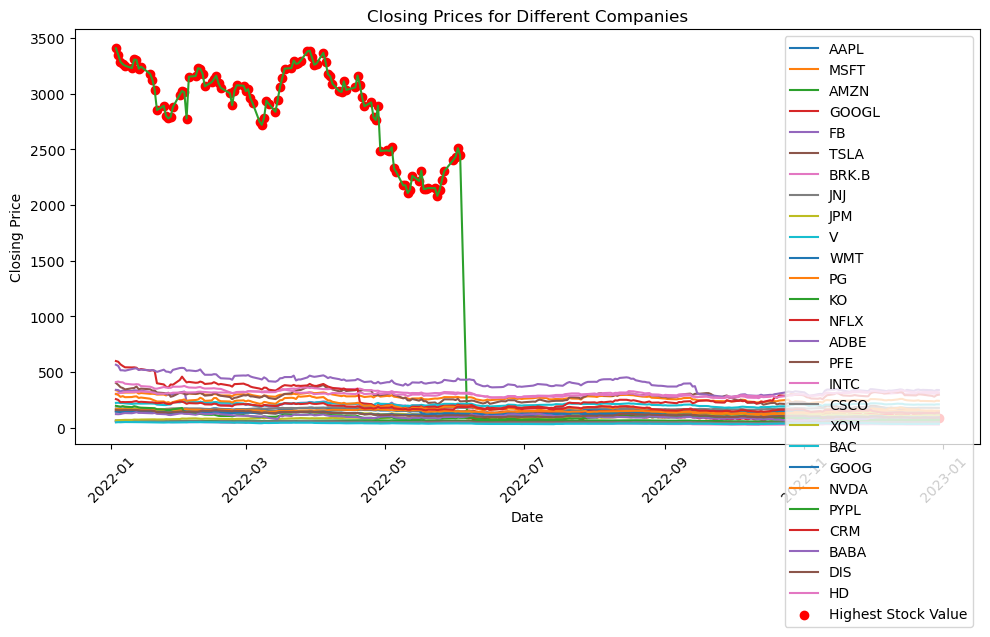

In [32]:
# Find the company with the highest stock value
max_stock_value = stocks_df['close'].max()
company_with_highest_stock = stocks_df.loc[stocks_df['close'] == max_stock_value, 'symbol'].iloc[0]

# Plot closing prices for each company
plt.figure(figsize=(10, 6))
for symbol in stocks_df['symbol'].unique():
    company_data = stocks_df[stocks_df['symbol'] == symbol]
    plt.plot(company_data.index, company_data['close'], label=symbol)

# Highlight the company with the highest stock value
highest_stock_company_data = stocks_df[stocks_df['symbol'] == company_with_highest_stock]
plt.scatter(highest_stock_company_data.index, highest_stock_company_data['close'], color='red', label='Highest Stock Value')

plt.title('Closing Prices for Different Companies')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [33]:
# Sort DataFrame by 'close' column in descending order
sorted_stocks_df = stocks_df.sort_values(by='close', ascending=False)

# Filter out duplicate companies
unique_top_ten_companies = sorted_stocks_df.drop_duplicates(subset='symbol').head(10)

print("Top Ten Companies with Highest Stock Values (No Duplicates):")
print(unique_top_ten_companies[['symbol', 'close']])

Top Ten Companies with Highest Stock Values (No Duplicates):
           symbol        close
priceDate                     
2022-01-03   AMZN  3408.090000
2022-01-03   NFLX   597.370000
2022-01-03   ADBE   564.370000
2022-01-04     HD   412.840000
2022-01-03   TSLA   399.886674
2022-03-28  BRK.B   359.570000
2022-01-03     FB   338.540000
2022-01-03   MSFT   334.750000
2022-01-03   NVDA   301.210000
2022-01-03    CRM   255.460000


##### The top 10 companies with highest stock values

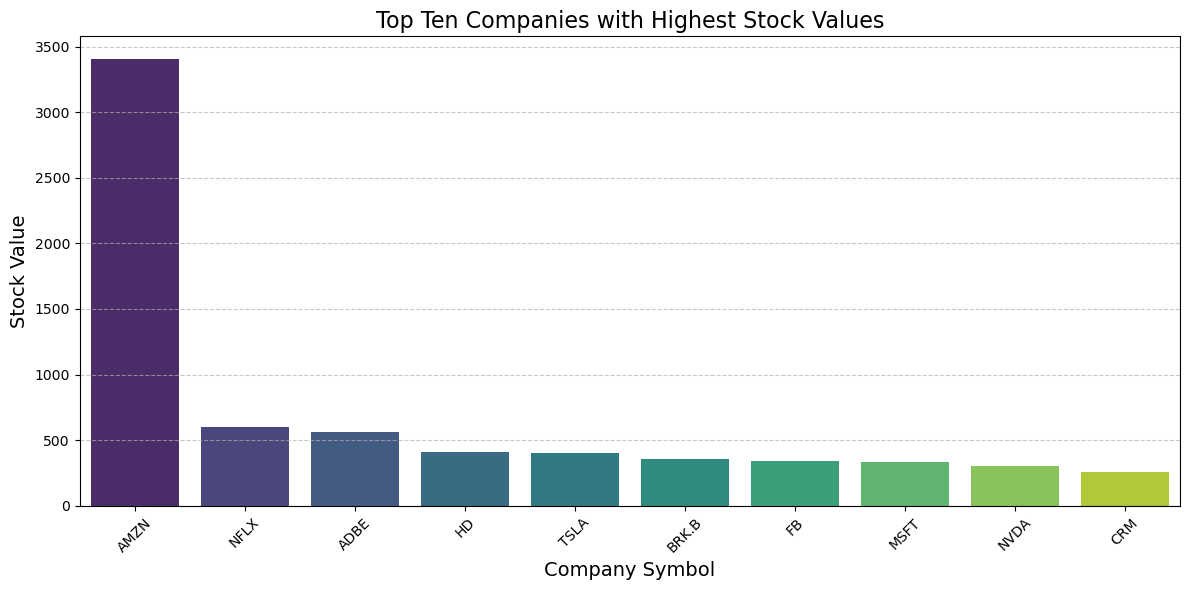

In [34]:
# Sort DataFrame by 'close' column in descending order
sorted_stocks_df = stocks_df.sort_values(by='close', ascending=False)

# Filter out duplicate companies
unique_top_ten_companies = sorted_stocks_df.drop_duplicates(subset='symbol').head(10)

# Plot bar graph
plt.figure(figsize=(12, 6))
sns.barplot(data=unique_top_ten_companies, x='symbol', y='close', palette='viridis')
plt.xlabel('Company Symbol', fontsize=14)
plt.ylabel('Stock Value', fontsize=14)
plt.title('Top Ten Companies with Highest Stock Values', fontsize=16)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### The top 10 companies with highest RSI

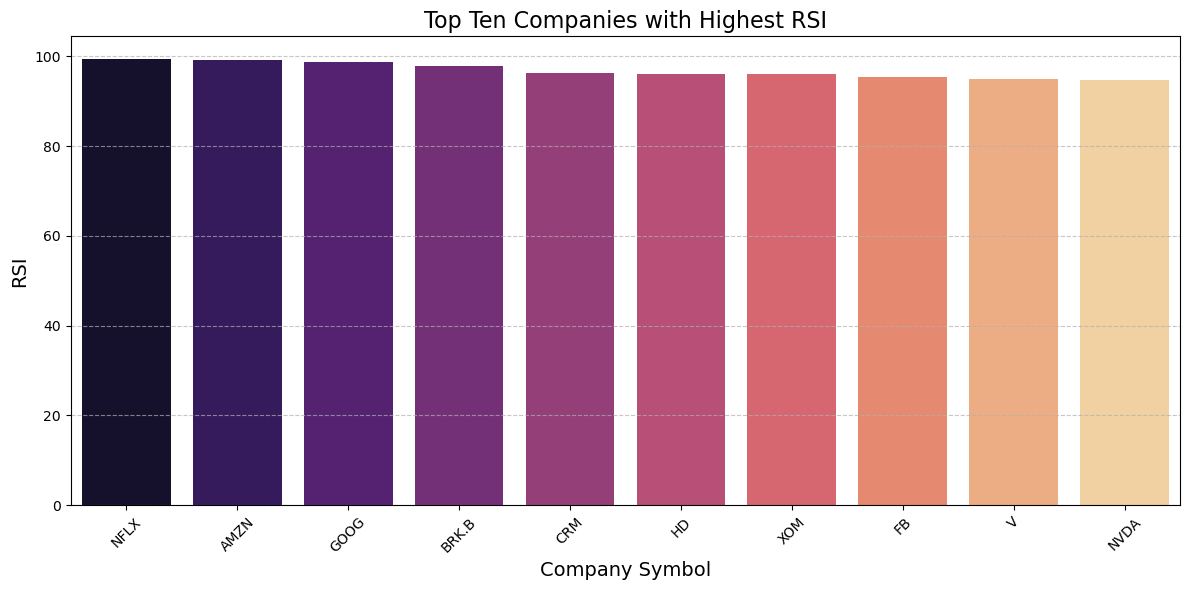

In [35]:
# Sort DataFrame by 'RSI' column in descending order
sorted_stocks_df = stocks_df.sort_values(by='rsi', ascending=False)

# Filter out duplicate companies
unique_top_ten_companies = sorted_stocks_df.drop_duplicates(subset='symbol').head(10)

# Plot bar graph
plt.figure(figsize=(12, 6))
sns.barplot(data=unique_top_ten_companies, x='symbol', y='rsi', palette='magma')
plt.xlabel('Company Symbol', fontsize=14)
plt.ylabel('RSI', fontsize=14)
plt.title('Top Ten Companies with Highest RSI', fontsize=16)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

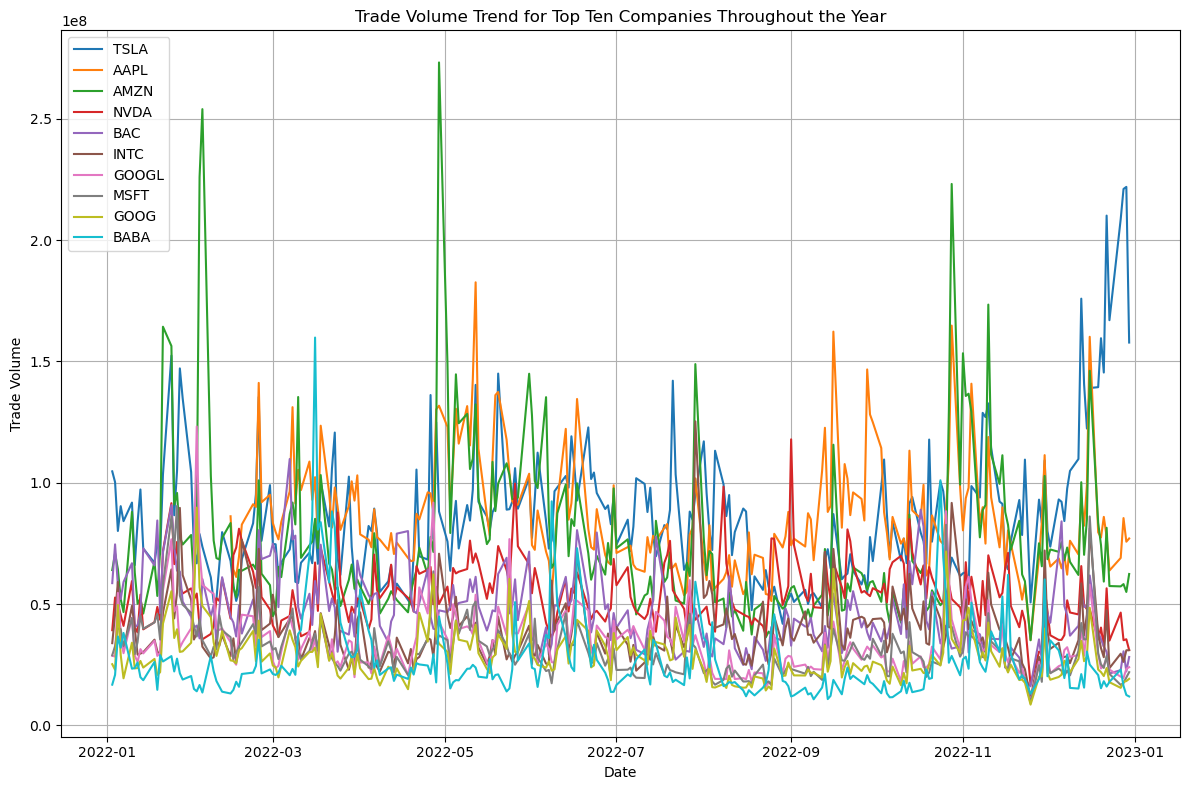

In [36]:
# Filter the DataFrame to include only the top ten companies by trade volume
top_ten_companies = stocks_df.groupby('symbol')['volume'].sum().nlargest(10).index
top_ten_data = stocks_df[stocks_df['symbol'].isin(top_ten_companies)]

# Plot the trade volume trend for the top ten companies
plt.figure(figsize=(12, 8))
for company in top_ten_companies:
    company_data = top_ten_data[top_ten_data['symbol'] == company]
    plt.plot(company_data.index, company_data['volume'], label=company)

plt.title('Trade Volume Trend for Top Ten Companies Throughout the Year')
plt.xlabel('Date')
plt.ylabel('Trade Volume')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Tesla, Apple Inc, Amazon, NVIDIA Corporation, and Bank of America Coorporation were the top traded stocks while Adobe Inc, The Home Depot, Berkshire Hathaway Inc. - Class B, and Johnson & Johnson were among the least traded companies in 2022. High trade volume indicates a high level of investor interest and activity in buying and selling the stock, suggesting increased liquidity and potential price movement. Conversely, low trade volume suggests less interest and activity, which can sometimes indicate less liquidity and potentially less price movement. Also, most trades happened in the second quarter and the forth quarter of 2022.

### Correlation Heatmap

Here, we will examine the relationship between the close stock price with other variables in the data set using a heatmap to visualize the correlation matrix. A heatmap can show us the strength and direction of the correlation between two variables using different colors and shades.

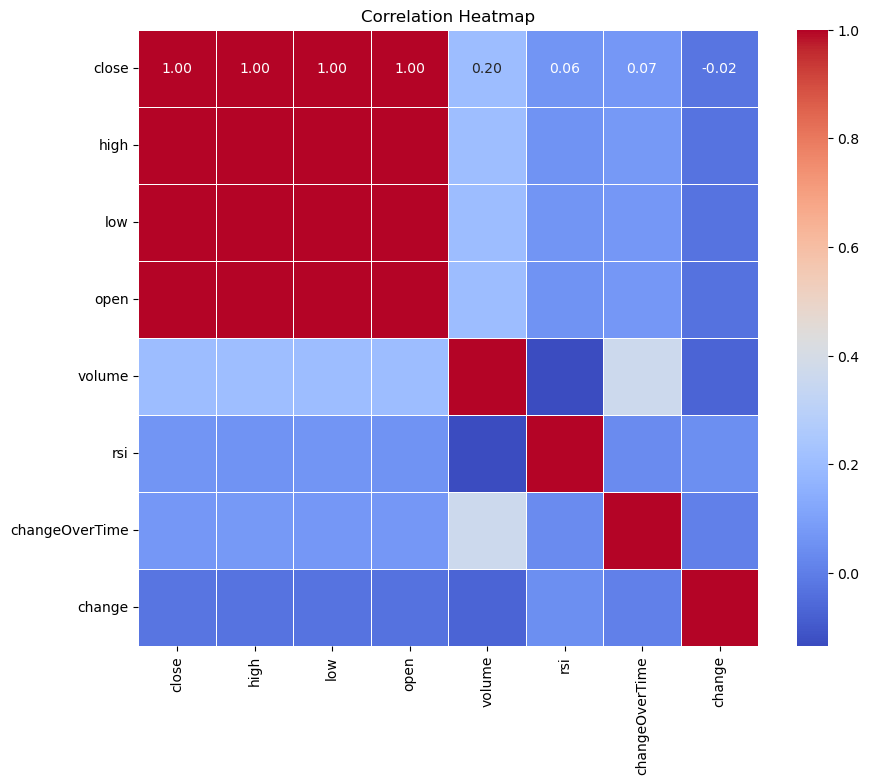

In [37]:
# Calculate the correlation matrix
import seaborn as sns
correlation_matrix = stocks_df[['close', 'high', 'low', 'open', 'volume','rsi','changeOverTime','change']].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

Most of these variable, except 'change' have a postivie correlation with the close price. This suggest that their values significantly increase with the increase in the close price.

### RSI vs Close Stock Price

We will analyse the relationship between close price and RSI to confirm the direction and strength of trends in the stock prices and possible trading signals.

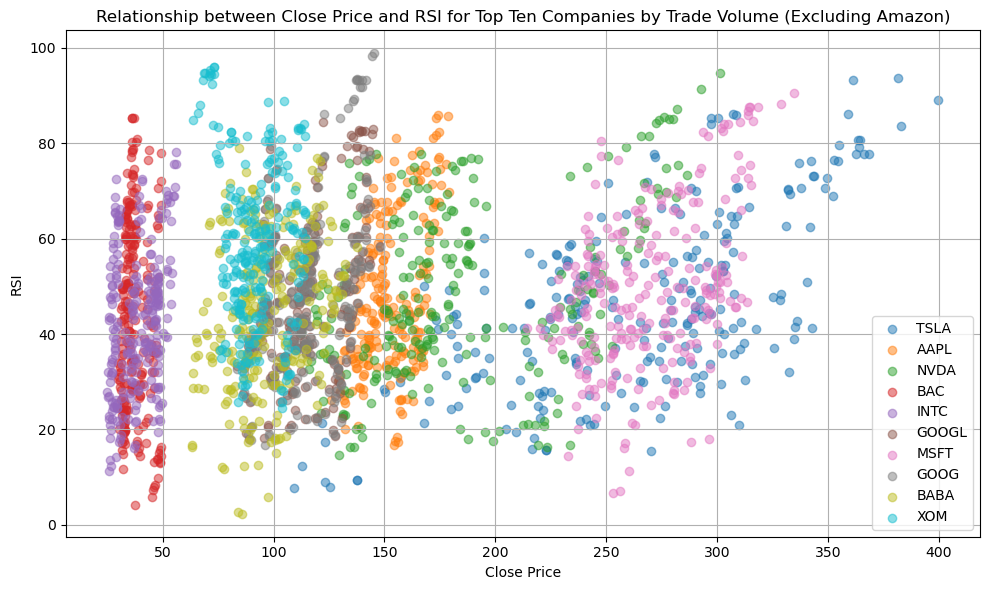

In [38]:
# Calculate the total volume for each company
total_volume_by_company = stocks_df.groupby('symbol')['volume'].sum()

# Get the symbols of the top ten companies by volume excluding Amazon
top_ten_companies = total_volume_by_company.drop('AMZN').nlargest(10).index

# Filter the DataFrame to include only data for the top ten companies excluding Amazon
top_ten_data = stocks_df[stocks_df['symbol'].isin(top_ten_companies)]

# Create a scatter plot of Close Price vs. RSI for the top ten companies excluding Amazon
plt.figure(figsize=(10, 6))
for company in top_ten_companies:
    company_data = top_ten_data[top_ten_data['symbol'] == company]
    plt.scatter(company_data['close'], company_data['rsi'], alpha=0.5, label=company)

plt.title('Relationship between Close Price and RSI for Top Ten Companies by Trade Volume (Excluding Amazon)')
plt.xlabel('Close Price')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

There is a positive correlation between the RSI and stock prices. This suggests that as stock price increase, the rsi increase as well. This trend also indicates a strong buying pressure. As RSI measures the magnitude of recent price gains, a rising RSI suggests that gains are outweighing losses over time. This indicates robust buying activity and positive market sentiment.

## Modelling

### **Time series Decomposition**

We will do the time series decomposition for only **'AMZN'** and **'NFLX'**. Breaking the non-stationary time series into its three components—trend, seasonality, and residuals—is indeed a helpful approach for investigating the pattern in the past and aiding in the forecasting future stock values.

In [39]:
# Extracting stock price data for AMZN and NFLX after the train-test split
#amzn_train_data = y_train[X_train['symbol'] == 'AMZN']
#nflx_train_data = y_train[X_train['symbol'] == 'NFLX']

#amzn_test_data = y_test[X_test['symbol'] == 'AMZN']
#nflx_test_data = y_test[X_test['symbol'] == 'NFLX']

In [40]:
# Step 1: Extract stock price data for AMZN and NFLX
amzn_df = stocks_df[stocks_df['symbol'] == 'AMZN']
nflx_df = stocks_df[stocks_df['symbol'] == 'NFLX']

amzn_data = amzn_df.loc[amzn_df['symbol'] == 'AMZN', 'close']
nflx_data = nflx_df.loc[nflx_df['symbol'] == 'NFLX', 'close']

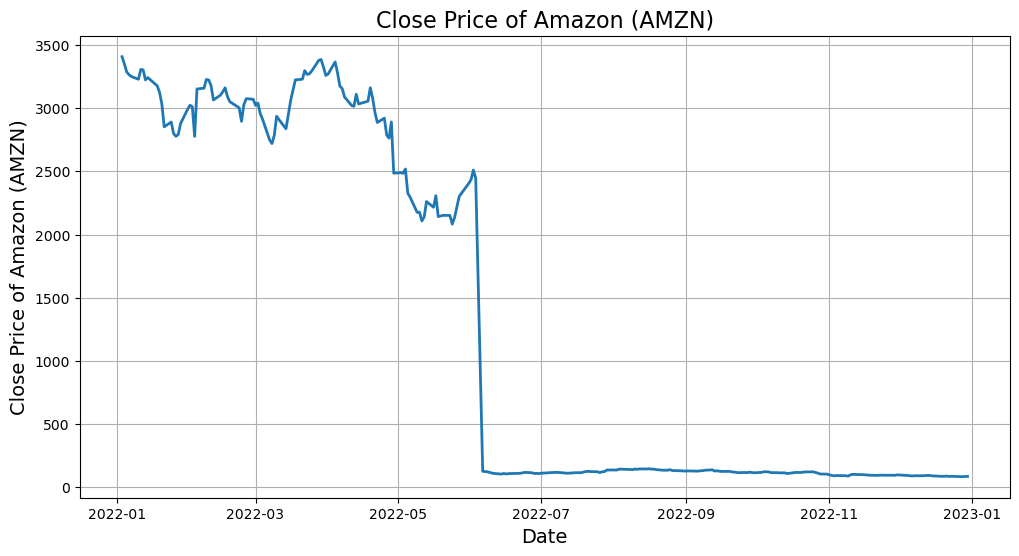

In [41]:
# Plot the raw monthly returns data for AMZN
plt.figure(figsize=(12, 6))
plt.plot(amzn_data, linewidth=2)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price of Amazon (AMZN)', fontsize=14)
plt.title('Close Price of Amazon (AMZN)', fontsize=16)
plt.grid(True)
plt.show()

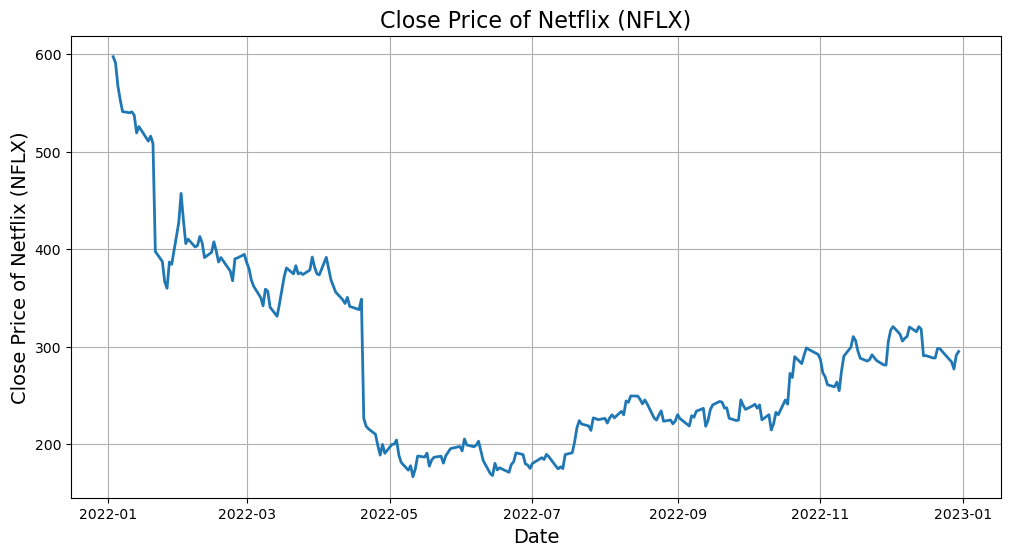

In [42]:
# Plot the raw monthly returns data for AMZN
plt.figure(figsize=(12, 6))
plt.plot(nflx_data, linewidth=2)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price of Netflix (NFLX)', fontsize=14)
plt.title('Close Price of Netflix (NFLX)', fontsize=16)
plt.grid(True)
plt.show()

### Trend on AMZN

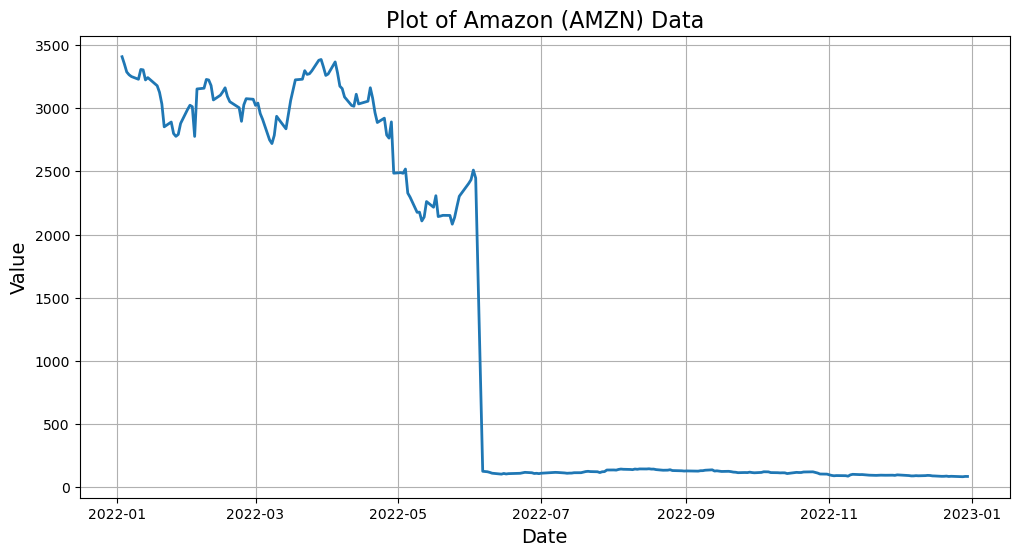

In [43]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(amzn_data.index, amzn_data.values, linewidth=2)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('Plot of Amazon (AMZN) Data', fontsize=16)
plt.grid(True)
plt.show()

### Trend on AMZN

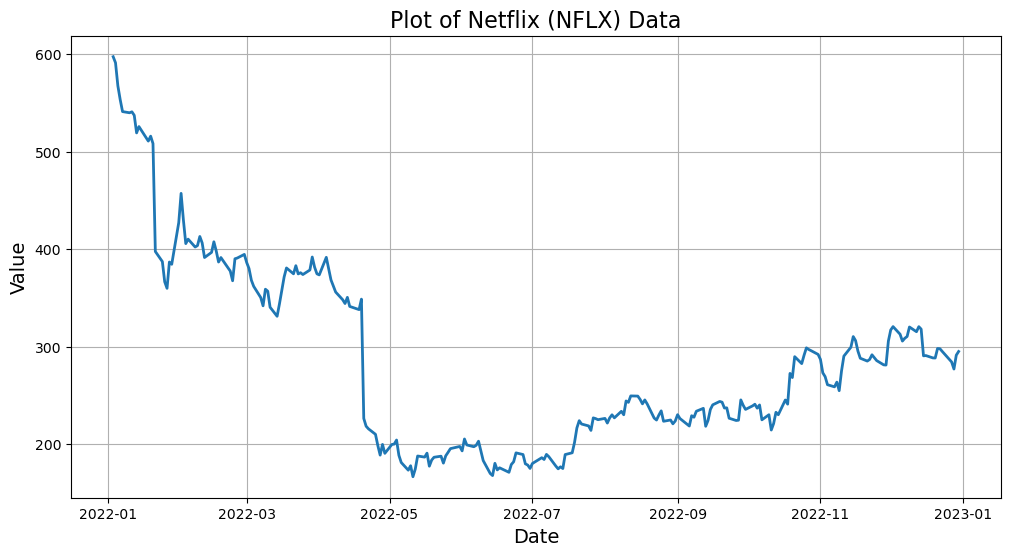

In [44]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(nflx_data.index, nflx_data.values, linewidth=2)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('Plot of Netflix (NFLX) Data', fontsize=16)
plt.grid(True)
plt.show()

We perform time series decomposition for **AMZN**

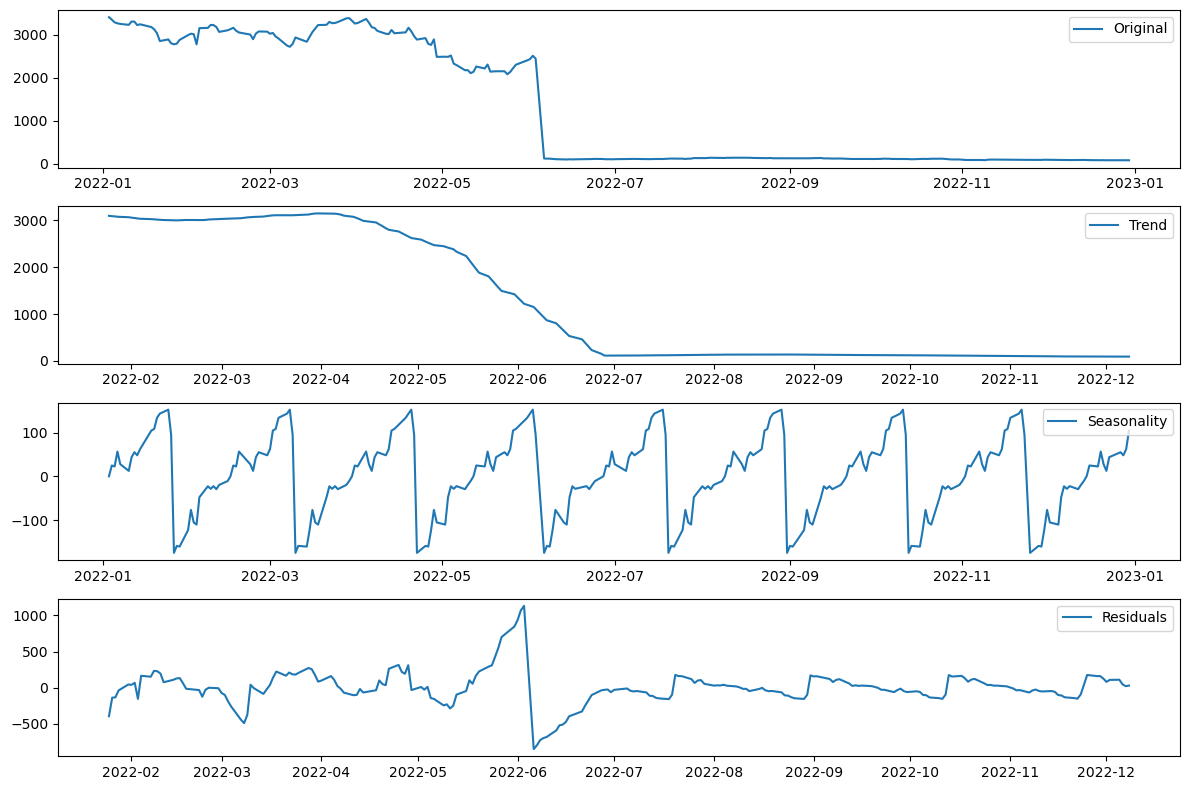

In [45]:
# Perform time series decomposition for AMZN
amzn_decomposition = seasonal_decompose(amzn_data, model='additive', period=30)

# Plot AMZN decomposition
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(amzn_data, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(amzn_decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(amzn_decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(amzn_decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

We perform time series decomposition for **NFLX**

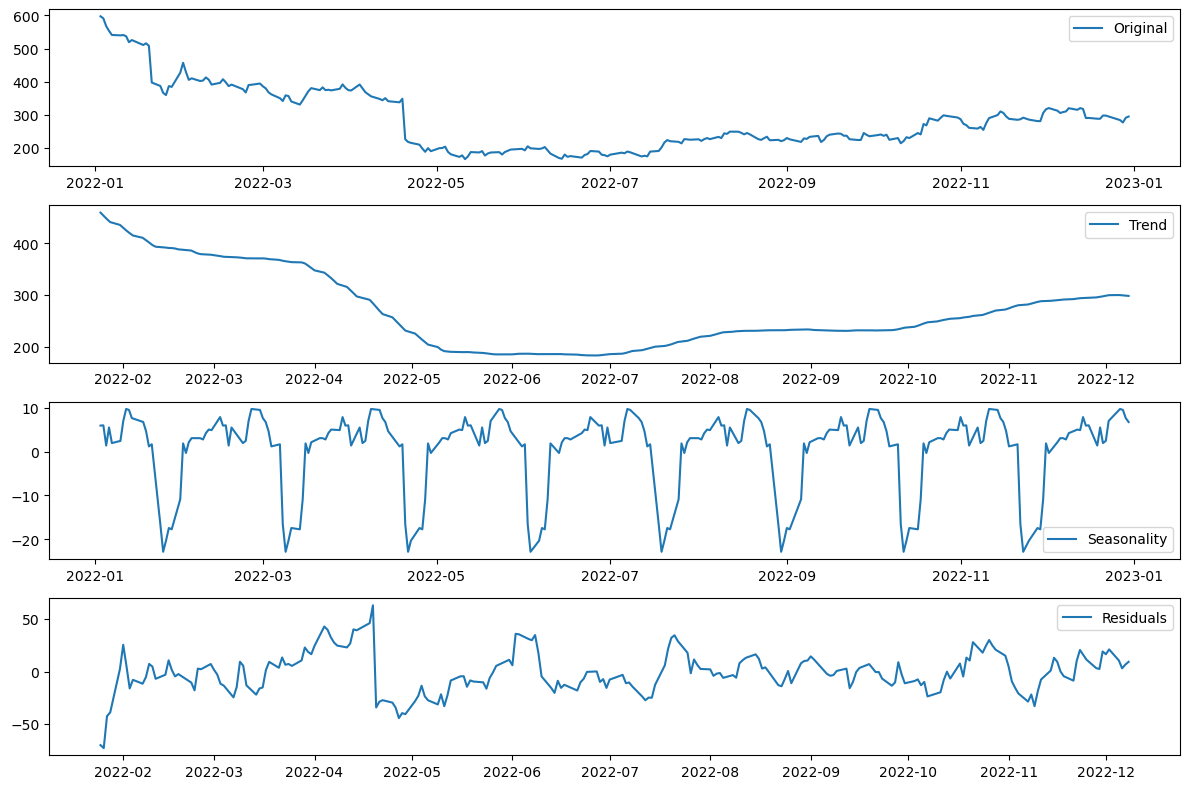

In [46]:
#Perform time series decomposition for NFLX
nflx_decomposition = seasonal_decompose(nflx_data, model='additive', period=30) 

# Plot NFLX decomposition
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(nflx_data, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(nflx_decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(nflx_decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(nflx_decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### Stationarity

#### **Rolling Statistics** for AMZN

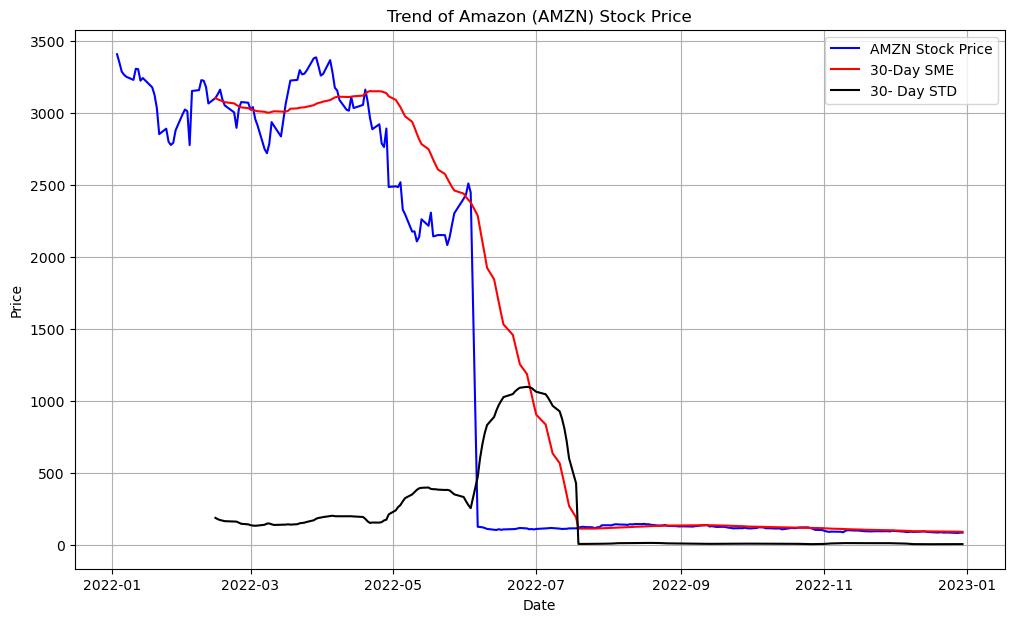

In [47]:
# Calculate simple moving averages (SMA) for 30 days
window = 30
amzn_mean = amzn_data.rolling(window=window).mean()
amzn_std = amzn_data.rolling(window=window).std()

# Plot AMZN stock prices and SMA
fig = plt.figure(figsize=(12,7))
plt.plot(amzn_data, color='blue', label='AMZN Stock Price')
plt.plot(amzn_mean, color='red', label=f'{window}-Day SME')
plt.plot(amzn_std, color = 'black', label = f'{window}- Day STD')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.title('Trend of Amazon (AMZN) Stock Price')
plt.grid(True)
plt.show()

The mean is not constant over time, so we can reconfirm our conclusion that the time series is non- stationary based on the rollig mean

#### **Dickey-Fuller**

In [48]:
result = adfuller(amzn_data)
# Extract and print test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -1.3346312911062364
p-value: 0.6131833499420565
Critical Values:
   1%: -3.456780859712
   5%: -2.8731715065600003
   10%: -2.572968544


**ADF Test Result for Amazon Stock Prices**

For the ADF test results you provided:

1. ADF Statistic: -1.33
2. p-value: 0.6

The p-value is higher than commonly accepted significance levels (like 0.05). We conclude that the Amazon stock prices data is likely non-stationary, meaning its statistical properties may change over time.


### Detrending the AMZN series

It is import to detrend so that it can imporve the accuracy of forecasting models. We are going to detrend using the **Differencing method**.

In [49]:
# Compute the first-order difference
amzn_diff = amzn_data.diff(periods=1)

# Display the first few rows of the differenced data
print(amzn_diff.head(10))

priceDate
2022-01-03      NaN
2022-01-04   -57.65
2022-01-05   -63.30
2022-01-06   -22.06
2022-01-07   -14.00
2022-01-10   -21.36
2022-01-11    77.52
2022-01-12    -3.10
2022-01-13   -79.86
2022-01-14    18.48
Name: close, dtype: float64


In [50]:
amzn_diff = amzn_diff.dropna()
amzn_diff

priceDate
2022-01-04   -57.65
2022-01-05   -63.30
2022-01-06   -22.06
2022-01-07   -14.00
2022-01-10   -21.36
              ...  
2022-12-23     1.46
2022-12-27    -2.21
2022-12-28    -1.22
2022-12-29     2.36
2022-12-30    -0.18
Name: close, Length: 250, dtype: float64

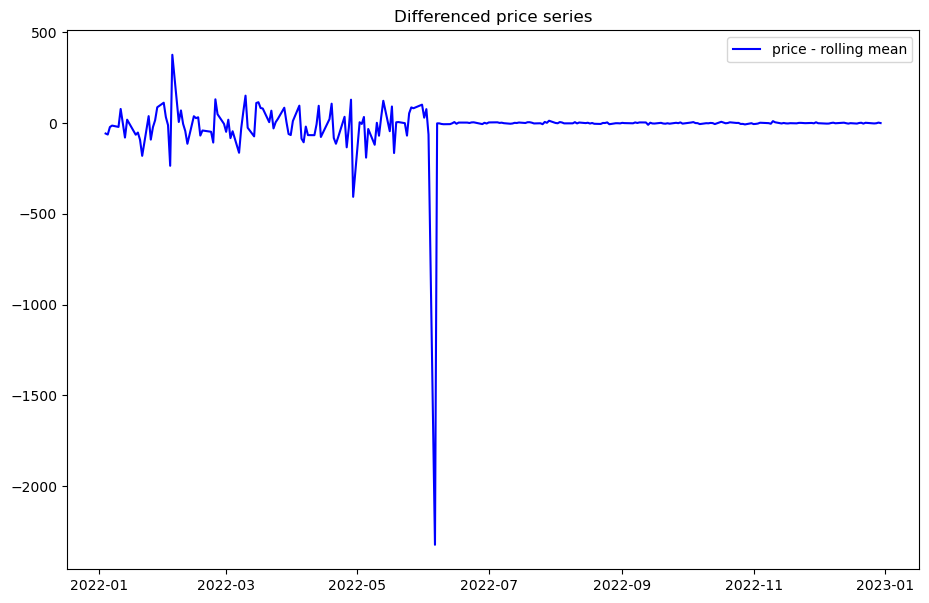

ADF Statistic: -15.592701557403087
p-value: 1.8714446099099064e-28
Critical Values: {'1%': -3.4568881317725864, '5%': -2.8732185133016057, '10%': -2.5729936189738876}


In [51]:
amzn_diff.dropna(inplace=True)

fig = plt.figure(figsize=(11,7))
plt.plot(amzn_diff, color='blue',label='price - rolling mean')
plt.legend(loc='best')
plt.title('Differenced price series')
plt.show(block=False)

# Print ADF test results
detrend_result_diff = adfuller(amzn_diff)

print('ADF Statistic:', detrend_result_diff[0])
print('p-value:', detrend_result_diff[1])
print('Critical Values:', detrend_result_diff[4])


### Auto-Correlation and Partial Auto-Correlation of the Differenced Data
Plotting the ACF and PACF functions help determine the AR and MA components in the models we intend to build. These functions consider all the above components of a time series like the trend and the seasonality and find their correlations

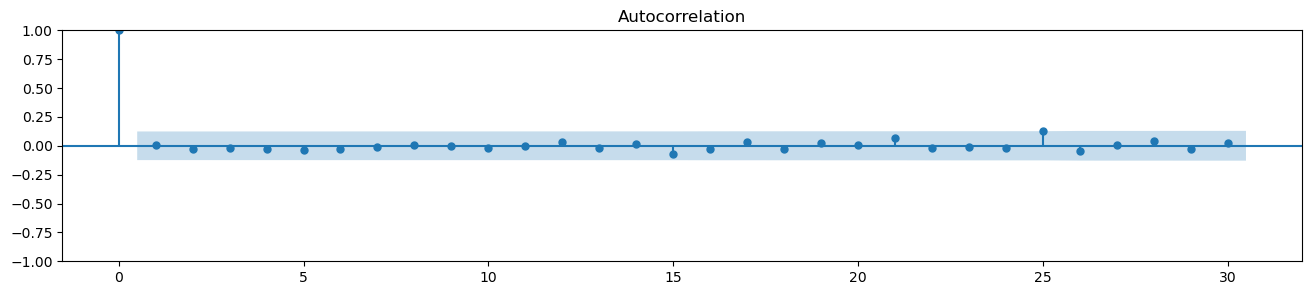

In [52]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot the ACF
fig, ax = plt.subplots(figsize=(16, 3))
plot_acf(amzn_diff, ax=ax, lags=30)
plt.show();

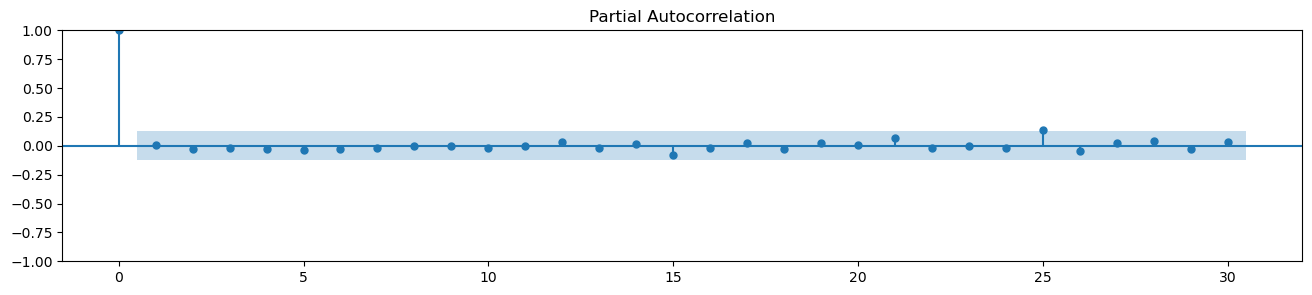

In [53]:
from statsmodels.graphics.tsaplots import plot_pacf

# Plot the PACF
fig, ax = plt.subplots(figsize = (16,3))
plot_pacf(amzn_diff, ax=ax, lags=30, method="ywm");

### Rolling Statistics Netflix

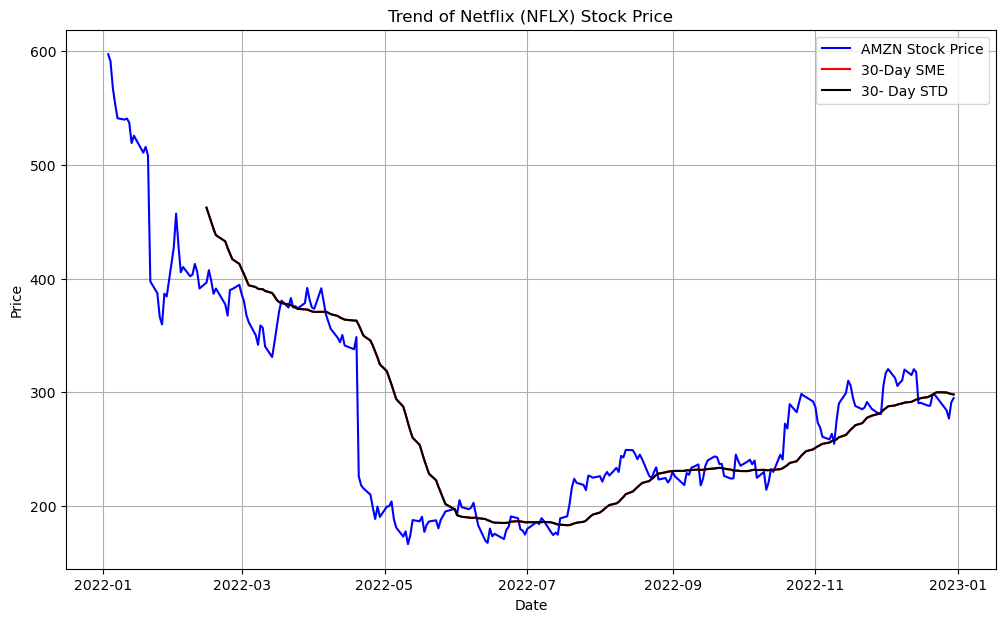

In [54]:
# Calculate simple moving averages (SMA) for 30 days
window = 30
nflx_mean = nflx_data.rolling(window=window).mean()
nflx_std = nflx_data.rolling(window=window).std()

# Plot AMZN stock prices and SMA
fig = plt.figure(figsize=(12,7))
plt.plot(nflx_data, color='blue', label='AMZN Stock Price')
plt.plot(nflx_mean, color='red', label=f'{window}-Day SME')
plt.plot(nflx_mean, color = 'black', label = f'{window}- Day STD')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.title('Trend of Netflix (NFLX) Stock Price')
plt.grid(True)
plt.show()

#### **Dickey-Fuller**

In [55]:
result = adfuller(nflx_data)
# Extract and print test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -3.5600197342949422
p-value: 0.006573006263161007
Critical Values:
   1%: -3.456780859712
   5%: -2.8731715065600003
   10%: -2.572968544


### Detrending the Netflix series

It is import to detrend so that it can imporve the accuracy of forecasting models. We are going to detrend using the **Differencing method**.

In [56]:
# Compute the first-order difference
nflx_diff = nflx_data.diff(periods=1)

# Display the first few rows of the differenced data
print(nflx_diff.head(10))

priceDate
2022-01-03      NaN
2022-01-04    -6.22
2022-01-05   -23.63
2022-01-06   -14.23
2022-01-07   -12.23
2022-01-10    -1.21
2022-01-11     0.99
2022-01-12    -3.62
2022-01-13   -18.02
2022-01-14     6.49
Name: close, dtype: float64


In [57]:
nflx_diff = nflx_diff.dropna()
nflx_diff

priceDate
2022-01-04    -6.220
2022-01-05   -23.630
2022-01-06   -14.230
2022-01-07   -12.230
2022-01-10    -1.210
               ...  
2022-12-23    -2.785
2022-12-27   -10.795
2022-12-28    -7.290
2022-12-29    14.240
2022-12-30     3.760
Name: close, Length: 250, dtype: float64

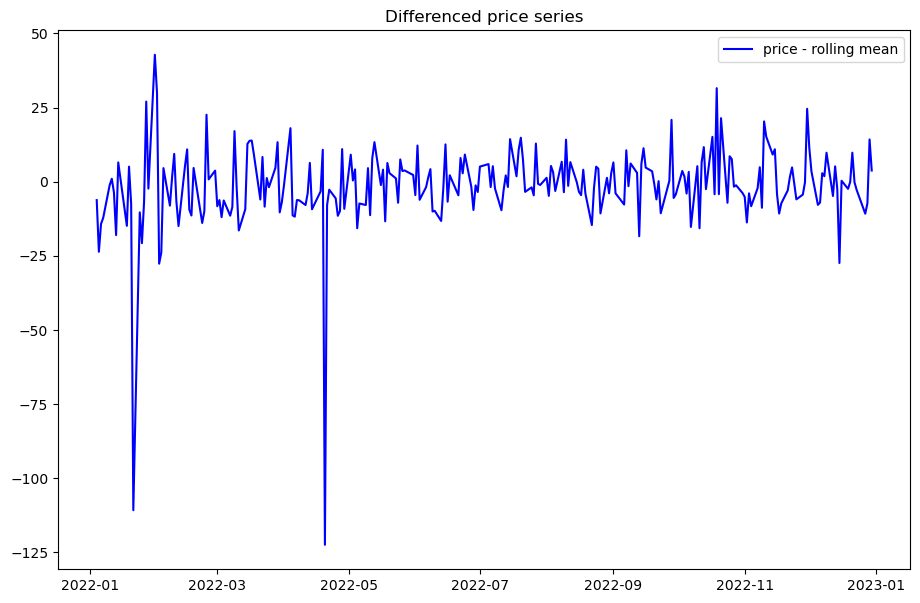

ADF Statistic: -14.867516830745085
p-value: 1.682675988302387e-27
Critical Values: {'1%': -3.4568881317725864, '5%': -2.8732185133016057, '10%': -2.5729936189738876}


In [58]:
nflx_diff.dropna(inplace=True)

fig = plt.figure(figsize=(11,7))
plt.plot(nflx_diff, color='blue',label='price - rolling mean')
plt.legend(loc='best')
plt.title('Differenced price series')
plt.show(block=False)

# Print ADF test results
detrend_result_diff1 = adfuller(nflx_diff)

print('ADF Statistic:', detrend_result_diff1[0])
print('p-value:', detrend_result_diff1[1])
print('Critical Values:', detrend_result_diff1[4])

### Auto-Correlation and Partial Auto-Correlation of the Differenced Data (NFLX)

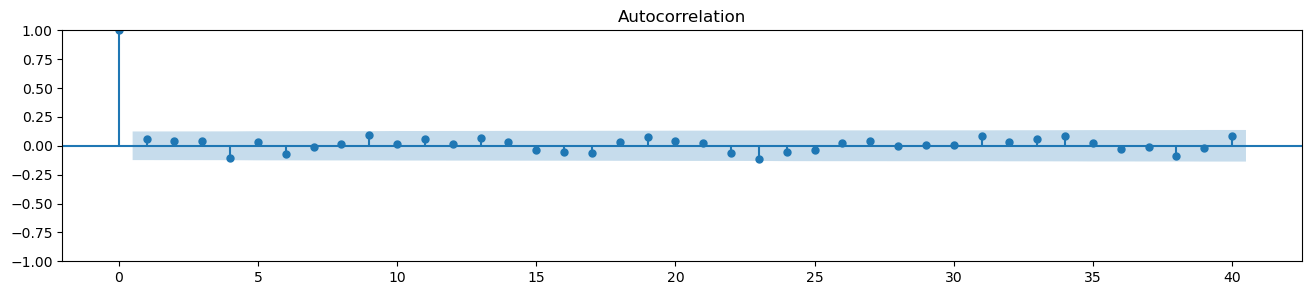

In [59]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot the ACF
fig, ax = plt.subplots(figsize=(16, 3))
plot_acf(nflx_diff, ax=ax, lags=40)
plt.show();

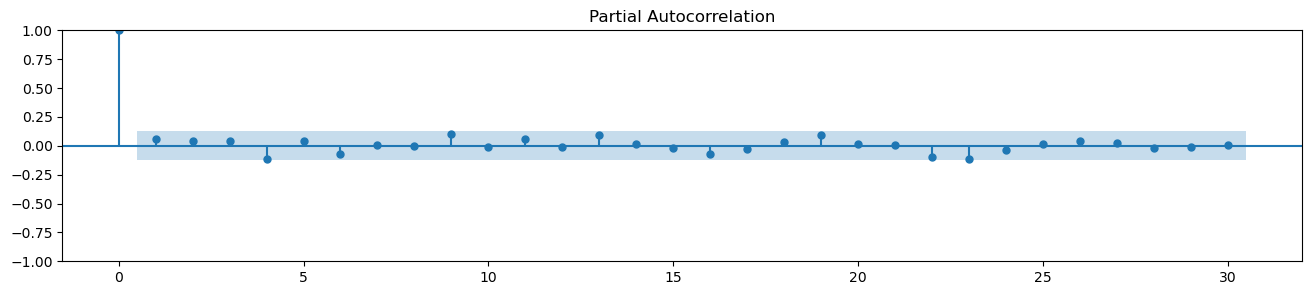

In [60]:
from statsmodels.graphics.tsaplots import plot_pacf

# Plot the PACF
fig, ax = plt.subplots(figsize = (16,3))
plot_pacf(nflx_diff, ax=ax, lags=30, method="ywm");


# Modelling the Time Series for AMZN and NFLX

* This section look at the iterative modeling process in a bid to deteremin the best model perfomance.
* In this section we will use the `AIC(Akaike's Information Criterion)` and `BIC(Bayesian Information Criterion)` as our metrics as the detereminant of the model perfomances.

For the modeling, we decided to pick the following for modelling: 
1. Moving Average - Base Model  (MA)
2. Autoregressive Model (AR)
3. AutoRegressive Moving Average Model (ARMA)
4. AutoRegressive Moving Integrated Average Model (ARIMA)
5. Seasonal AutoRegressive Moving Average (SARIMA) Model.
6. Facebook Prophet Model. 

In [61]:
#amzn_diff = amzn_diff.ffill()

In [62]:
#nflx_diff = nflx_diff.ffill()

## 1. Moving Average (MA) Base Model (AMZN)

We build a MA model as our baseline model then increase its complexity with more complex models

In [63]:
# 2. Identify missing dates
missing_dates = pd.date_range(start=amzn_diff.index.min(), end=amzn_diff.index.max()).difference(amzn_diff.index)

# 3. Create a new date range that covers all dates in the original index
new_index = pd.date_range(start=amzn_diff.index.min(), end=amzn_diff.index.max())

# 4. Reindex the DataFrame with the new date range
amzn_diff = amzn_diff.reindex(new_index)

# Optionally, fill missing values with appropriate values
# amzn_diff.fillna(method='ffill', inplace=True)


In [64]:
## Fit an MA model
model_ma = ARIMA(amzn_diff, order =(0,0,1))
result_ma = model_ma.fit()

print(result_ma.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  361
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1621.220
Date:                Fri, 03 May 2024   AIC                           3248.439
Time:                        11:04:39   BIC                           3260.106
Sample:                    01-04-2022   HQIC                          3253.078
                         - 12-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.1389     24.955     -0.526      0.599     -62.050      35.772
ma.L1         -0.0544      0.091     -0.600      0.549      -0.232       0.123
sigma2      2.511e+04    675.216     37.192      0.0

In [65]:
print(result_ma.params)

const       -13.138894
ma.L1        -0.054399
sigma2    25112.700141
dtype: float64


## Moving Average (MA) Base Model (NFLX)

We build a MA model as our baseline model then increase its complexity with more complex models

In [66]:
# 2. Identify missing dates
missing_dates = pd.date_range(start=nflx_diff.index.min(), end=nflx_diff.index.max()).difference(amzn_diff.index)

# 3. Create a new date range that covers all dates in the original index
new_index = pd.date_range(start=nflx_diff.index.min(), end=nflx_diff.index.max())

# 4. Reindex the DataFrame with the new date range
nflx_diff = nflx_diff.reindex(new_index)

# Optionally, fill missing values with appropriate values
# amzn_diff.fillna(method='ffill', inplace=True)

In [67]:
## Fit an MA model
model_ma_two = ARIMA(nflx_diff, order =(0,0,1))
result_ma_two = model_ma_two.fit()

print(result_ma_two.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  361
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1020.431
Date:                Fri, 03 May 2024   AIC                           2046.861
Time:                        11:04:40   BIC                           2058.528
Sample:                    01-04-2022   HQIC                          2051.500
                         - 12-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2294      1.283     -0.959      0.338      -3.743       1.284
ma.L1          0.0510      0.083      0.614      0.539      -0.112       0.214
sigma2       205.3732      6.011     34.165      0.0

In [68]:
print(result_ma_two.params)

const      -1.229421
ma.L1       0.050996
sigma2    205.373181
dtype: float64


## 2. AutoRegressive (AR) Model (AMZN)

In [69]:
# Fit an AR model
mod_ar= ARIMA(amzn_diff, order=(1,0,0))
result_ar = mod_ar.fit()

# Print out summary information on the fit
print(result_ar.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  361
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1621.229
Date:                Fri, 03 May 2024   AIC                           3248.458
Time:                        11:04:42   BIC                           3260.124
Sample:                    01-04-2022   HQIC                          3253.096
                         - 12-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.2963     25.220     -0.527      0.598     -62.726      36.134
ar.L1         -0.0498      0.098     -0.507      0.612      -0.242       0.142
sigma2      2.524e+04    681.538     37.037      0.0

`Observation:`

* The `AIC value of 3248.458` and `BIC value of 3260.124` in our second model does not indicate an improvement in the balance between model fit and complexity compared to your previous model.

* These slightly higher AIC and BIC values suggest a not better fitting model or a reduction in unnecessary complexity.

## AutoRegressive (AR) Model (NFLX)

In [70]:
# Fit an AR model
mod_ar_two= ARIMA(nflx_diff, order=(1,0,0))
result_ar_two = mod_ar_two.fit()

# Print out summary information on the fit
print(result_ar_two.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  361
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1020.460
Date:                Fri, 03 May 2024   AIC                           2046.921
Time:                        11:04:43   BIC                           2058.588
Sample:                    01-04-2022   HQIC                          2051.559
                         - 12-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2206      1.280     -0.954      0.340      -3.729       1.288
ar.L1          0.0448      0.083      0.537      0.591      -0.119       0.208
sigma2       205.4345      6.016     34.149      0.0

## 3. AutoRegressive Moving Average (ARMA) Model (AMZN)

In [71]:
def grid_search_arma(data, p_values, q_values):
    best_aic, best_order = float('inf'), None
    
    for p in p_values:
        for q in q_values:
            order = (p, 0, q)  # Since d=0 for ARMA models
            try:
                model = ARIMA(data, order=order)
                model_fit = model.fit()
                aic = model_fit.aic
                if aic < best_aic:
                    best_aic, best_order = aic, order
                print(f'ARMA{order} AIC={aic:.2f}')
            except:
                continue
    
    return best_order, best_aic

# Define the range of p and q values for grid search
p_values = range(0, 3)  # Adjust range as needed
q_values = range(0, 3)  # Adjust range as needed

# Perform grid search to find the best ARMA model parameters
best_order, best_aic = grid_search_arma(amzn_diff, p_values, q_values)

print("Best ARMA order:", best_order)

ARMA(0, 0, 0) AIC=3246.63
ARMA(0, 0, 1) AIC=3248.44
ARMA(0, 0, 2) AIC=3250.39
ARMA(1, 0, 0) AIC=3248.46
ARMA(1, 0, 1) AIC=3250.42
ARMA(1, 0, 2) AIC=3252.09
ARMA(2, 0, 0) AIC=3250.38
ARMA(2, 0, 1) AIC=3252.05
ARMA(2, 0, 2) AIC=3254.08
Best ARMA order: (0, 0, 0)


In [72]:
# Fit an ARMA model
model_arma = ARIMA(amzn_diff, order=(0,0,0))
result_arma = model_arma.fit()

# Print out summary information on the fit
print(result_arma.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  361
Model:                          ARIMA   Log Likelihood               -1621.316
Date:                Fri, 03 May 2024   AIC                           3246.632
Time:                        11:04:56   BIC                           3254.410
Sample:                    01-04-2022   HQIC                          3249.724
                         - 12-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.2964     26.048     -0.510      0.610     -64.350      37.758
sigma2      2.516e+04    617.709     40.737      0.000     2.4e+04    2.64e+04
Ljung-Box (L1) (Q):                   0.07   Jarque-

`Observation:`

* The `AIC value of 3250.417` and `BIC value of 3265.972` in our model.  This is a bit higher than the previous model therefore the model is not best fit.


### AutoRegressive Moving Average (ARMA) Model (NFLX)

In [73]:
def grid_search_arma(data, p_values, q_values):
    best_aic, best_order = float('inf'), None
    
    for p in p_values:
        for q in q_values:
            order = (p, 0, q)  # Since d=0 for ARMA models
            try:
                model = ARIMA(data, order=order)
                model_fit = model.fit()
                aic = model_fit.aic
                if aic < best_aic:
                    best_aic, best_order = aic, order
                print(f'ARMA{order} AIC={aic:.2f}')
            except:
                continue
    
    return best_order, best_aic

# Define the range of p and q values for grid search
p_values = range(0, 3)  # Adjust range as needed
q_values = range(0, 3)  # Adjust range as needed

# Perform grid search to find the best ARMA model parameters
best_order, best_aic = grid_search_arma(nflx_diff, p_values, q_values)

print("Best ARMA order:", best_order)


ARMA(0, 0, 0) AIC=2045.33
ARMA(0, 0, 1) AIC=2046.86
ARMA(0, 0, 2) AIC=2048.04
ARMA(1, 0, 0) AIC=2046.92
ARMA(1, 0, 1) AIC=2048.48
ARMA(1, 0, 2) AIC=2050.00
ARMA(2, 0, 0) AIC=2047.86
ARMA(2, 0, 1) AIC=2049.79
ARMA(2, 0, 2) AIC=2050.42
Best ARMA order: (0, 0, 0)


In [74]:
# Fit an ARMA model
model_arma_two = ARIMA(nflx_diff, order=(0,0,0))
result_arma_two = model_arma_two.fit()

# Print out summary information on the fit
print(result_arma_two.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  361
Model:                          ARIMA   Log Likelihood               -1020.666
Date:                Fri, 03 May 2024   AIC                           2045.332
Time:                        11:05:03   BIC                           2053.110
Sample:                    01-04-2022   HQIC                          2048.424
                         - 12-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2100      1.224     -0.988      0.323      -3.609       1.189
sigma2       205.9116      6.020     34.206      0.000     194.113     217.710
Ljung-Box (L1) (Q):                   0.49   Jarque-

## 4. AutoRegressie Integrated Moving Avergaes (AMZN)

In [75]:
# Import ARIMA
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

In [150]:
import warnings
def grid_search_arima(data, p_values, d_values, q_values):
    best_aic, best_order = float('inf'), None
    
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                try:
                    model = ARIMA(data, order=order)
                    model_fit = model.fit()
                    aic = model_fit.aic
                    if aic < best_aic:
                        best_aic, best_order = aic, order
                    print(f'ARIMA{order} AIC={aic:.2f}')
                except:
                    continue
    
    return best_order, best_aic

# Define the range of p, d, and q values for grid search
p_values = range(0, 5)  
d_values = range(0, 3)  
q_values = range(0, 5)  

# Perform grid search to find the best ARIMA model parameters
best_order, best_aic = grid_search_arima(amzn_diff, p_values, d_values, q_values)

print("Best ARIMA order:", best_order)

ARIMA(0, 0, 0) AIC=3246.63
ARIMA(0, 0, 1) AIC=3248.61
ARIMA(0, 0, 2) AIC=3250.43
ARIMA(0, 0, 3) AIC=3252.35
ARIMA(0, 0, 4) AIC=3254.17
ARIMA(0, 1, 0) AIC=3403.20
ARIMA(0, 1, 1) AIC=3240.16
ARIMA(0, 1, 2) AIC=3242.13
ARIMA(0, 1, 3) AIC=3243.99
ARIMA(0, 1, 4) AIC=3245.96
ARIMA(0, 2, 0) AIC=3660.12
ARIMA(0, 2, 1) AIC=3397.99
ARIMA(0, 2, 2) AIC=3243.78
ARIMA(0, 2, 3) AIC=3245.67
ARIMA(0, 2, 4) AIC=3247.57
ARIMA(1, 0, 0) AIC=3248.62
ARIMA(1, 0, 1) AIC=3250.10
ARIMA(1, 0, 2) AIC=3251.76
ARIMA(1, 0, 3) AIC=3253.74
ARIMA(1, 0, 4) AIC=3255.65
ARIMA(1, 1, 0) AIC=3339.40
ARIMA(1, 1, 1) AIC=3242.12
ARIMA(1, 1, 2) AIC=3243.87
ARIMA(1, 1, 3) AIC=3245.86
ARIMA(1, 1, 4) AIC=3247.95
ARIMA(1, 2, 0) AIC=3523.54
ARIMA(1, 2, 1) AIC=3335.19
ARIMA(1, 2, 2) AIC=3245.67
ARIMA(1, 2, 3) AIC=3247.68
ARIMA(1, 2, 4) AIC=3249.66
ARIMA(2, 0, 0) AIC=3250.45
ARIMA(2, 0, 1) AIC=3251.75
ARIMA(2, 0, 2) AIC=3253.68
ARIMA(2, 0, 3) AIC=3255.67
ARIMA(2, 0, 4) AIC=3257.60
ARIMA(2, 1, 0) AIC=3312.33
ARIMA(2, 1, 1) AIC=3243.99
A

In [80]:
# 2. Identify missing dates
#missing_dates = pd.date_range(start=amzn_diff.index.min(), end=amzn_diff.index.max()).difference(amzn_diff.index)

# 3. Create a new date range that covers all dates in the original index
#new_index = pd.date_range(start=amzn_diff.index.min(), end=amzn_diff.index.max())

# 4. Reindex the DataFrame with the new date range
#amzn_diff = amzn_diff.reindex(new_index)

# Optionally, fill missing values with appropriate values
# amzn_diff.fillna(method='ffill', inplace=True)


In [83]:
model_arima = ARIMA(amzn_diff, order =(0,1,1)) #(0,1,1)
arima_result = model_arima.fit()

print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  361
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1618.088
Date:                Fri, 03 May 2024   AIC                           3240.175
Time:                        11:07:47   BIC                           3247.948
Sample:                    01-04-2022   HQIC                          3243.266
                         - 12-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9979      0.355     -2.813      0.005      -1.693      -0.302
sigma2      2.529e+04   7064.232      3.581      0.000    1.14e+04    3.91e+04
Ljung-Box (L1) (Q):                   0.10   Jarque-

In [84]:
# Define the number of forecast steps (assuming daily data)
forecast_steps = 365 * 3  # Forecast for the next 3 years

# Make forecasts
forecast = arima_result.forecast(steps=forecast_steps)

# Print the forecasted values
print(forecast)


2022-12-31   -12.8055
2023-01-01   -12.8055
2023-01-02   -12.8055
2023-01-03   -12.8055
2023-01-04   -12.8055
               ...   
2025-12-25   -12.8055
2025-12-26   -12.8055
2025-12-27   -12.8055
2025-12-28   -12.8055
2025-12-29   -12.8055
Freq: D, Name: predicted_mean, Length: 1095, dtype: float64


2022-12-31   -12.8055
2023-01-01   -12.8055
2023-01-02   -12.8055
2023-01-03   -12.8055
2023-01-04   -12.8055
               ...   
2025-12-25   -12.8055
2025-12-26   -12.8055
2025-12-27   -12.8055
2025-12-28   -12.8055
2025-12-29   -12.8055
Freq: D, Name: predicted_mean, Length: 1095, dtype: float64


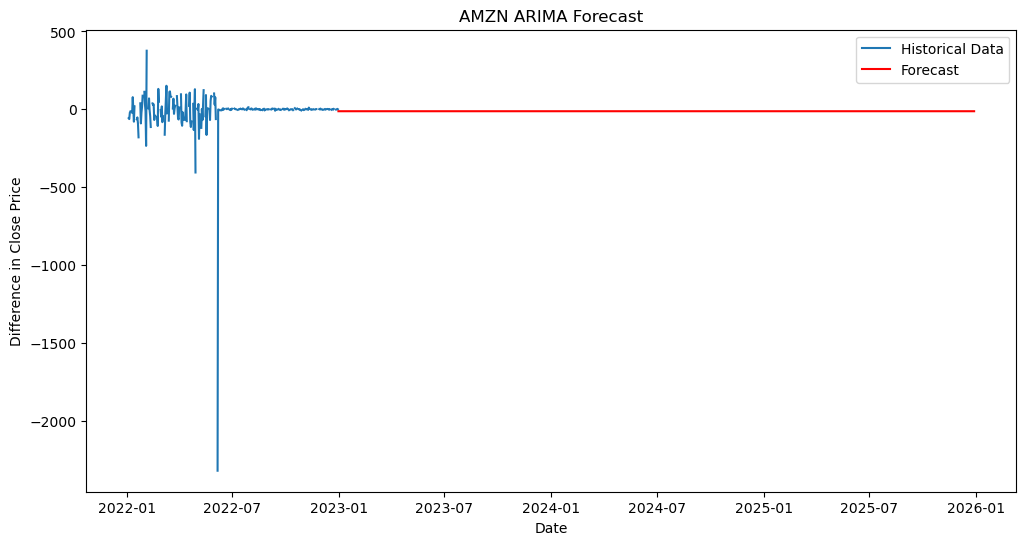

In [85]:
# Forecast future values
forecast_steps = 365 * 3  # Forecast for the next 3 years (assuming daily data)
forecast = arima_result.forecast(steps=forecast_steps)

# Print forecasted values
print(forecast)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(amzn_diff, label='Historical Data')
plt.plot(forecast, color='red', label='Forecast')
plt.title('AMZN ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Difference in Close Price')
plt.legend()
plt.show()

`Observation:`

* The `AIC value of 3242.061` and `BIC value of 3252.719` in our model. This indicare an improvemnt in our model. The lower AIC and BIC suggest a better fitting model


### AutoRegressie Integrated Moving Avergaes (NFLX)

In [86]:
import warnings


def grid_search_arima(data, p_values, d_values, q_values):
    best_aic, best_order = float('inf'), None
    
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                try:
                    # Suppress ARIMA convergence warnings temporarily
                    with warnings.catch_warnings():
                        warnings.simplefilter("ignore")
                        model = ARIMA(data, order=order)
                        model_fit = model.fit()
                    aic = model_fit.aic
                    if aic < best_aic:
                        best_aic, best_order = aic, order
                    print(f'ARIMA{order} AIC={aic:.2f}')
                except:
                    continue
    
    return best_order, best_aic

# Define the range of p, d, and q values for grid search
p_values = range(0, 5)  # Adjust range as needed
d_values = range(0, 3)  # Adjust range as needed
q_values = range(0, 5)  # Adjust range as needed

# Perform grid search to find the best ARIMA model parameters
best_order, best_aic = grid_search_arima(nflx_diff, p_values, d_values, q_values)

print("Best ARIMA order:", best_order)


ARIMA(0, 0, 0) AIC=2045.33
ARIMA(0, 0, 1) AIC=2046.86
ARIMA(0, 0, 2) AIC=2048.04
ARIMA(0, 0, 3) AIC=2049.49
ARIMA(0, 0, 4) AIC=2034.66
ARIMA(0, 1, 0) AIC=2220.33
ARIMA(0, 1, 1) AIC=2040.84
ARIMA(0, 1, 2) AIC=2042.66
ARIMA(0, 1, 3) AIC=2043.05
ARIMA(0, 1, 4) AIC=2044.69
ARIMA(0, 2, 0) AIC=2553.38
ARIMA(0, 2, 1) AIC=2220.56
ARIMA(0, 2, 2) AIC=2046.21
ARIMA(0, 2, 3) AIC=2047.92
ARIMA(0, 2, 4) AIC=2048.67
ARIMA(1, 0, 0) AIC=2046.92
ARIMA(1, 0, 1) AIC=2048.48
ARIMA(1, 0, 2) AIC=2050.00
ARIMA(1, 0, 3) AIC=2051.68
ARIMA(1, 0, 4) AIC=2036.53
ARIMA(1, 1, 0) AIC=2154.61
ARIMA(1, 1, 1) AIC=2042.70
ARIMA(1, 1, 2) AIC=2042.85
ARIMA(1, 1, 3) AIC=2044.85
ARIMA(1, 1, 4) AIC=2046.05
ARIMA(1, 2, 0) AIC=2384.31
ARIMA(1, 2, 1) AIC=2155.83
ARIMA(1, 2, 2) AIC=2047.96
ARIMA(1, 2, 3) AIC=2048.33
ARIMA(1, 2, 4) AIC=2050.30
ARIMA(2, 0, 0) AIC=2047.86
ARIMA(2, 0, 1) AIC=2049.79
ARIMA(2, 0, 2) AIC=2050.42
ARIMA(2, 0, 3) AIC=2051.19
ARIMA(2, 0, 4) AIC=2038.44
ARIMA(2, 1, 0) AIC=2103.36
ARIMA(2, 1, 1) AIC=2042.50
A

In [97]:
model_arima_two = ARIMA(nflx_diff, order =(3,1,3))
arima_result_two = model_arima_two.fit()

print(arima_result_two.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  250
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -1014.950
Date:                Fri, 03 May 2024   AIC                           2043.899
Time:                        11:11:33   BIC                           2068.522
Sample:                             0   HQIC                          2053.810
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0812      0.718     -1.505      0.132      -2.489       0.326
ar.L2         -0.1459      0.666     -0.219      0.827      -1.451       1.160
ar.L3          0.0925      0.072      1.286      0.1

250     0.692758
251     1.501968
252    -0.557074
253     1.267397
254    -0.329951
          ...   
1340    0.384215
1341    0.384215
1342    0.384215
1343    0.384215
1344    0.384215
Name: predicted_mean, Length: 1095, dtype: float64


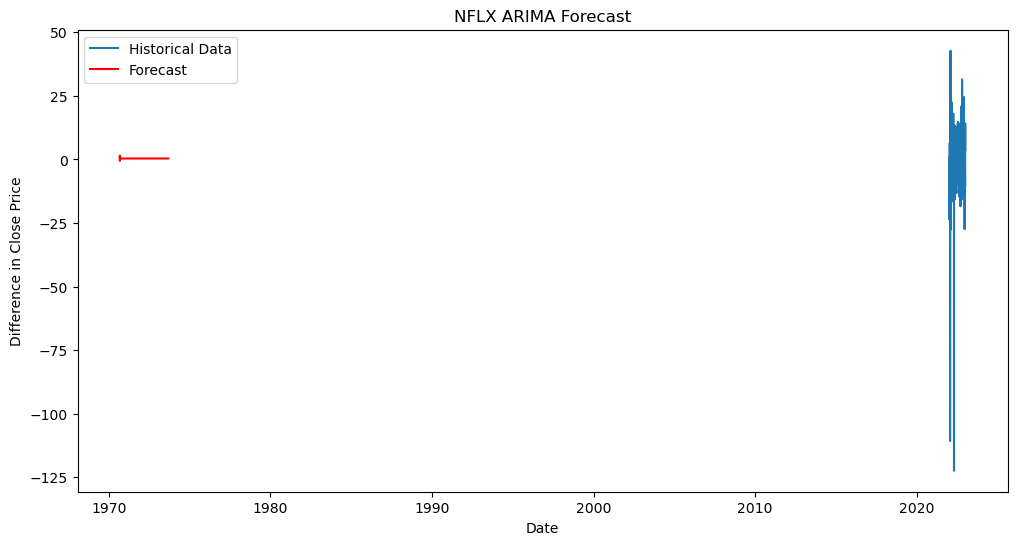

In [98]:
# Forecast future values
forecast_steps = 365 * 3  # Forecast for the next 3 years (assuming daily data)
forecast = arima_result_two.forecast(steps=forecast_steps)

# Print forecasted values
print(forecast)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(nflx_diff, label='Historical Data')
plt.plot(forecast, color='red', label='Forecast')
plt.title('NFLX ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Difference in Close Price')
plt.legend()

                                     SARIMAX Results                                     
Dep. Variable:                             close   No. Observations:                  361
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -1598.261
Date:                           Fri, 03 May 2024   AIC                           3206.522
Time:                                   11:10:01   BIC                           3225.854
Sample:                               01-04-2022   HQIC                          3214.214
                                    - 12-30-2022                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0424      0.188     -0.225      0.822      -0.411       0.326
ma.L1         -0.9999      3.360     -0.298

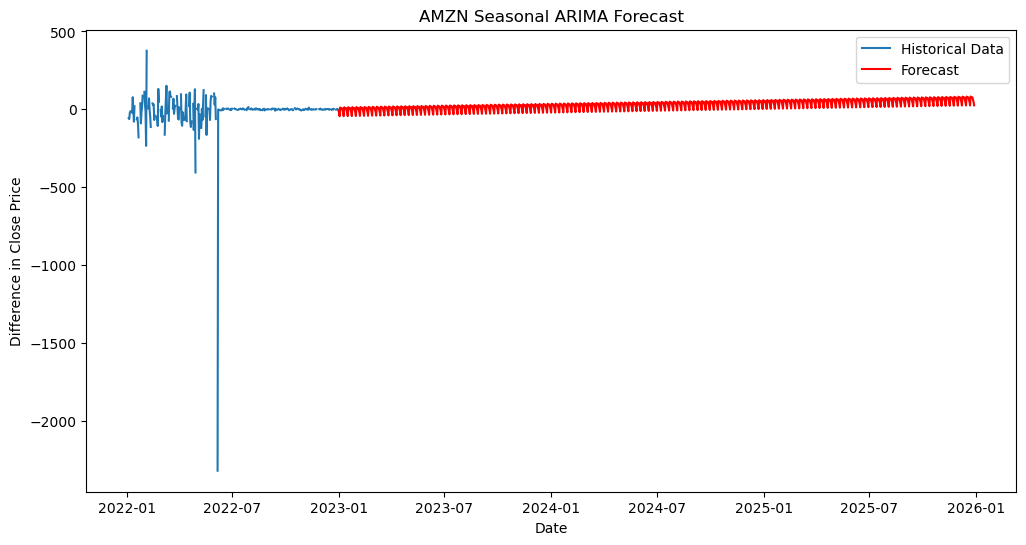

In [89]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit a seasonal ARIMA model with a period of 7 (weekly seasonality)
model_sarima = SARIMAX(amzn_diff, order=(1,1,1), seasonal_order=(1,1,1,7))
arima_result_sarima = model_sarima.fit()

print(arima_result_sarima.summary())

# Forecast future values
forecast_steps = 365 * 3  # Forecast for the next 3 years (assuming daily data)
forecast_sarima = arima_result_sarima.forecast(steps=forecast_steps)


# Print forecasted values
print(forecast_sarima)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(amzn_diff, label='Historical Data')
plt.plot(forecast_sarima, color='red', label='Forecast')
plt.title('AMZN Seasonal ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Difference in Close Price')
plt.legend()
plt.show()

## 5. Seasonal AutoRegressive Moving Average Model (SARIMA) (AMZN)

In [90]:
!pip install pmdarima

import pmdarima as pm

In [91]:
nflx_diff = nflx_diff.dropna()
amzn_diff = amzn_diff.dropna()

In [92]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Train-test split
train_data = amzn_diff.iloc[:len(amzn_diff) - 12]
test_data = amzn_diff.iloc[len(amzn_diff) - 12:]

#  Fit the model
model = pm.auto_arima(amzn_diff, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train_data) 

# Print model summary to identify the best p,d,q
print(f"Summary for amzn_diff {amzn_diff}:")
print(model.summary())
print()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=3254.446, Time=0.75 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3246.632, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3248.618, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3248.616, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3246.383, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3250.615, Time=0.38 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 1.451 seconds
Summary for amzn_diff 2022-01-04   -57.65
2022-01-05   -63.30
2022-01-06   -22.06
2022-01-07   -14.00
2022-01-10   -21.36
              ...  
2022-12-23     1.46
2022-12-27    -2.21
2022-12-28    -1.22
2022-12-29     2.36
2022-12-30    -0.18
Name: close, Length: 250, dtype: float64:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  238
Model:                        SARIMAX   Lo

In [93]:
nflx_diff.index

DatetimeIndex(['2022-01-04', '2022-01-05', '2022-01-06', '2022-01-07',
               '2022-01-10', '2022-01-11', '2022-01-12', '2022-01-13',
               '2022-01-14', '2022-01-18',
               ...
               '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21',
               '2022-12-22', '2022-12-23', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', length=250, freq=None)

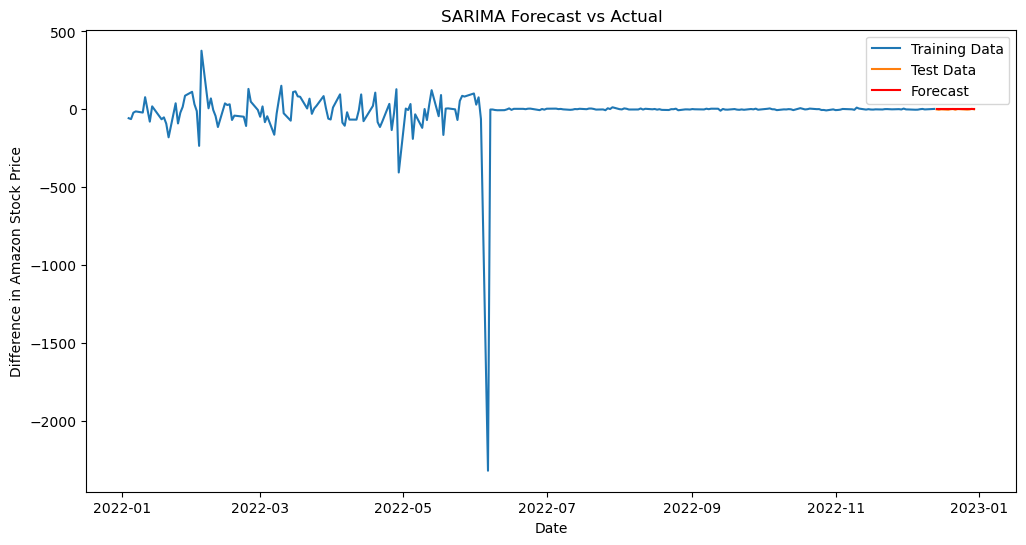

Mean Squared Error (MSE): 3.764374999999996


In [100]:
# Make predictions
forecast = model.predict(n_periods=len(test_data))

# Visualize predictions
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(test_data.index, forecast, label='Forecast', color='red')
plt.title('SARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Difference in Amazon Stock Price')
plt.legend()
plt.show()

# Evaluate performance
mse = mean_squared_error(test_data, forecast)
print(f'Mean Squared Error (MSE): {mse}')

### SARIMA Netflix (NFLX)

In [101]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Train-test split
train_data_two = nflx_diff.iloc[:len(nflx_diff) - 12]
test_data_two = nflx_diff.iloc[len(nflx_diff) - 12:]

#  Fit the model
model_two = pm.auto_arima(nflx_diff, trace=True, error_action='ignore', suppress_warnings=True)
model_two.fit(train_data_two) 

# Print model summary to identify the best p,d,q
print(f"Summary for nflx_diff {nflx_diff}:")
print(model_two.summary())
print()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2196.429, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2128.683, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2194.430, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2101.704, Time=0.23 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2099.360, Time=0.28 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=2085.755, Time=0.36 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=2085.008, Time=0.65 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.58 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.33 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=2083.038, Time=0.26 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=2083.784, Time=0.20 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=2045.999, Time=0.70 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=2044.150, T

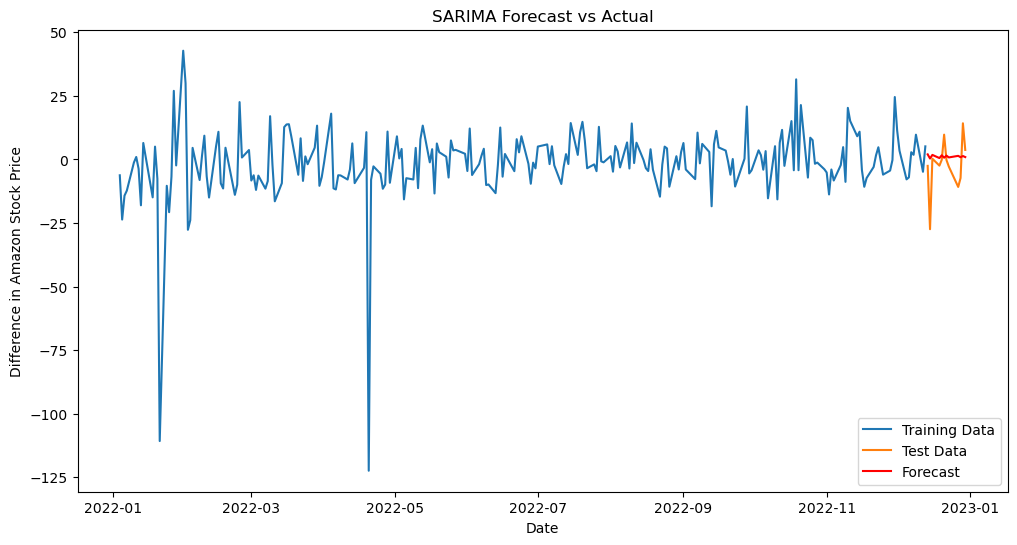

Mean Squared Error (MSE): 107.97814340125764


In [102]:
# Make predictions
forecast = model_two.predict(n_periods=len(test_data))

# Visualize predictions
plt.figure(figsize=(12, 6))
plt.plot(train_data_two.index, train_data_two, label='Training Data')
plt.plot(test_data_two.index, test_data_two, label='Test Data')
plt.plot(test_data_two.index, forecast, label='Forecast', color='red')
plt.title('SARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Difference in Amazon Stock Price')
plt.legend()
plt.show()

# Evaluate performance
mse = mean_squared_error(test_data_two, forecast)
print(f'Mean Squared Error (MSE): {mse}')

## 6. Facebook Prophet

**Prophet** is an open-source tool from Facebook used for forecasting time series data which helps businesses understand and possibly predict the market. It is based on a decomposable additive model where non-linear trends fit with seasonality, it also takes into account the effects of holidays.

In [103]:
amzn_diff.head()

2022-01-04   -57.65
2022-01-05   -63.30
2022-01-06   -22.06
2022-01-07   -14.00
2022-01-10   -21.36
Name: close, dtype: float64

In [104]:
amzn_diff_df = pd.DataFrame(amzn_diff)
amzn_diff_df.head()

,close
2022-01-04,-57.65
2022-01-05,-63.30
2022-01-06,-22.06
2022-01-07,-14.00
2022-01-10,-21.36


In [105]:
amzn_diff_df.index

DatetimeIndex(['2022-01-04', '2022-01-05', '2022-01-06', '2022-01-07',
               '2022-01-10', '2022-01-11', '2022-01-12', '2022-01-13',
               '2022-01-14', '2022-01-18',
               ...
               '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21',
               '2022-12-22', '2022-12-23', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', length=250, freq=None)

In [106]:
## covert the data type of close to numeric
amzn_diff_df['close'] = pd.to_numeric(amzn_diff_df['close'])

In [107]:
# Reset index 'priceDate'to  a column again
amzn_diff_df.reset_index(inplace=True)

## rename ds and y
amzn_diff_df.rename(columns={'priceDate': 'ds', 'close': 'y'}, inplace=True)

In [108]:
amzn_diff_df.dtypes

index    datetime64[ns]
y               float64
dtype: object

In [109]:
amzn_diff_df.columns

Index(['index', 'y'], dtype='object')

In [110]:
amzn_diff_df.head()

,index,y
0,2022-01-04,-57.65
1,2022-01-05,-63.30
2,2022-01-06,-22.06
3,2022-01-07,-14.00
4,2022-01-10,-21.36


In [111]:
amzn_diff_df.rename(columns={'index': 'ds'}, inplace=True)

In [112]:
amzn_diff_df.head()

,ds,y
0,2022-01-04,-57.65
1,2022-01-05,-63.30
2,2022-01-06,-22.06
3,2022-01-07,-14.00
4,2022-01-10,-21.36


In [113]:
amzn_diff_df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [114]:
series_amzn = amzn_df.copy()
series_amzn

,close,high,low,open,symbol,volume,id,key,updated,changeOverTime,...,month,quarter,year,7_day_ma,30_day_ma,close_std,rsi,close_lag_1,close_lag_7,close_pct_change
priceDate,,,,,,,,,,,,,,,,,,,,,
2022-01-03,3408.09,3414.070,3323.2100,3351.00,AMZN,6.399713e+07,HISTORICAL_PRICES,AMZN,1.713001e+12,0.847333,...,1,1,2022,691.047143,350.906000,1198.105079,99.115920,239.82,244.43,13.211033
2022-01-04,3350.44,3428.000,3326.9900,3408.76,AMZN,7.086689e+07,HISTORICAL_PRICES,AMZN,1.713001e+12,0.816085,...,1,1,2022,1135.654286,454.546667,1532.769654,97.364972,3408.09,238.19,-0.016916
2022-01-05,3287.14,3342.525,3287.1400,3337.66,AMZN,6.443158e+07,HISTORICAL_PRICES,AMZN,1.713001e+12,0.781773,...,1,1,2022,1571.141429,556.049667,1662.987829,95.513156,3350.44,238.73,-0.018893
2022-01-06,3265.08,3296.000,3238.7442,3269.01,AMZN,5.206190e+07,HISTORICAL_PRICES,AMZN,1.713001e+12,0.769816,...,1,1,2022,2003.730000,656.718000,1651.899352,95.117383,3287.14,236.96,-0.006711
2022-01-07,3251.08,3304.865,3240.6200,3276.78,AMZN,4.669930e+07,HISTORICAL_PRICES,AMZN,1.713001e+12,0.762227,...,1,1,2022,2434.665714,756.834667,1499.916835,94.842713,3265.08,234.53,-0.004288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,85.25,85.780,82.9344,83.25,AMZN,5.743366e+07,HISTORICAL_PRICES,AMZN,1.713003e+12,-0.953791,...,12,4,2022,86.032857,91.802667,1.698850,37.681779,83.79,91.58,0.017425
2022-12-27,83.04,85.350,83.0000,84.97,AMZN,5.728404e+07,HISTORICAL_PRICES,AMZN,1.713003e+12,-0.954989,...,12,4,2022,85.260000,91.211000,1.645701,38.589575,85.25,88.45,-0.025924
2022-12-28,81.82,83.480,81.6900,82.80,AMZN,5.822858e+07,HISTORICAL_PRICES,AMZN,1.713003e+12,-0.955650,...,12,4,2022,84.397143,90.655333,1.638696,36.073826,83.04,87.86,-0.014692


In [115]:
#transforms the index of the DataFrame into a regular column named 'Date',
series_amzn['priceDate'] = series_amzn.index
series_amzn

,close,high,low,open,symbol,volume,id,key,updated,changeOverTime,...,quarter,year,7_day_ma,30_day_ma,close_std,rsi,close_lag_1,close_lag_7,close_pct_change,priceDate
priceDate,,,,,,,,,,,,,,,,,,,,,
2022-01-03,3408.09,3414.070,3323.2100,3351.00,AMZN,6.399713e+07,HISTORICAL_PRICES,AMZN,1.713001e+12,0.847333,...,1,2022,691.047143,350.906000,1198.105079,99.115920,239.82,244.43,13.211033,2022-01-03
2022-01-04,3350.44,3428.000,3326.9900,3408.76,AMZN,7.086689e+07,HISTORICAL_PRICES,AMZN,1.713001e+12,0.816085,...,1,2022,1135.654286,454.546667,1532.769654,97.364972,3408.09,238.19,-0.016916,2022-01-04
2022-01-05,3287.14,3342.525,3287.1400,3337.66,AMZN,6.443158e+07,HISTORICAL_PRICES,AMZN,1.713001e+12,0.781773,...,1,2022,1571.141429,556.049667,1662.987829,95.513156,3350.44,238.73,-0.018893,2022-01-05
2022-01-06,3265.08,3296.000,3238.7442,3269.01,AMZN,5.206190e+07,HISTORICAL_PRICES,AMZN,1.713001e+12,0.769816,...,1,2022,2003.730000,656.718000,1651.899352,95.117383,3287.14,236.96,-0.006711,2022-01-06
2022-01-07,3251.08,3304.865,3240.6200,3276.78,AMZN,4.669930e+07,HISTORICAL_PRICES,AMZN,1.713001e+12,0.762227,...,1,2022,2434.665714,756.834667,1499.916835,94.842713,3265.08,234.53,-0.004288,2022-01-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,85.25,85.780,82.9344,83.25,AMZN,5.743366e+07,HISTORICAL_PRICES,AMZN,1.713003e+12,-0.953791,...,4,2022,86.032857,91.802667,1.698850,37.681779,83.79,91.58,0.017425,2022-12-23
2022-12-27,83.04,85.350,83.0000,84.97,AMZN,5.728404e+07,HISTORICAL_PRICES,AMZN,1.713003e+12,-0.954989,...,4,2022,85.260000,91.211000,1.645701,38.589575,85.25,88.45,-0.025924,2022-12-27
2022-12-28,81.82,83.480,81.6900,82.80,AMZN,5.822858e+07,HISTORICAL_PRICES,AMZN,1.713003e+12,-0.955650,...,4,2022,84.397143,90.655333,1.638696,36.073826,83.04,87.86,-0.014692,2022-12-28


In [116]:
series_amzn.columns

Index(['close', 'high', 'low', 'open', 'symbol', 'volume', 'id', 'key',
       'updated', 'changeOverTime', 'marketChangeOverTime', 'uOpen', 'uClose',
       'uHigh', 'uLow', 'uVolume', 'fOpen', 'fClose', 'fHigh', 'fLow',
       'fVolume', 'label', 'change', 'changePercent', 'Name', 'day_of_week',
       'month', 'quarter', 'year', '7_day_ma', '30_day_ma', 'close_std', 'rsi',
       'close_lag_1', 'close_lag_7', 'close_pct_change', 'priceDate'],
      dtype='object')

In [117]:
series_amzn = series_amzn[['priceDate','close']]
series_amzn = series_amzn.reset_index(drop=True)

In [118]:
series_amzn.head()

,priceDate,close
0,2022-01-03,3408.09
1,2022-01-04,3350.44
2,2022-01-05,3287.14
3,2022-01-06,3265.08
4,2022-01-07,3251.08


In [119]:
start_date = '2022-01-01'
end_date = '2022-12-31'
series_amzn = series_amzn[(series_amzn['priceDate'] >= start_date) & (series_amzn['priceDate'] <= end_date)]

In [120]:
series_amzn.columns = ['ds','y']
series_amzn.head()

,ds,y
0,2022-01-03,3408.09
1,2022-01-04,3350.44
2,2022-01-05,3287.14
3,2022-01-06,3265.08
4,2022-01-07,3251.08


In [121]:
## Intialize
amzn_prophet = Prophet()
amzn_prophet.fit(series_amzn)

11:12:50 - cmdstanpy - INFO - Chain [1] start processing
11:12:50 - cmdstanpy - INFO - Chain [1] done processing


In [122]:
# Define the number of periods and frequency
periods = 36  # Number of periods into the future
freq = 'MS'   # Frequency: Monthly start


# Make future dataframe
future_dates = amzn_prophet.make_future_dataframe(periods=periods, freq=freq)
forecast = amzn_prophet.predict(future_dates)


forecasted_data = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecasted_data

,ds,yhat,yhat_lower,yhat_upper
0,2022-01-03,3376.287893,2921.728772,3809.898528
1,2022-01-04,3371.709008,2945.368769,3802.966945
2,2022-01-05,3368.803225,2910.891946,3816.027045
3,2022-01-06,3364.553327,2946.811772,3809.859247
4,2022-01-07,3356.933900,2931.825707,3803.591527
...,...,...,...,...
282,2025-08-01,-256.870472,-11026.072806,10529.223438
283,2025-09-01,-269.865660,-11458.266339,11076.864746
284,2025-10-01,-276.248348,-12329.131705,11502.930848
285,2025-11-01,-283.376899,-13038.532772,12002.253719


In [124]:
# Trim the forecasted data to match the length of the actual data
forecasted_data_trimmed = forecasted_data.iloc[:len(series_amzn)]

# Extract actual and predicted values
actual_values = series_amzn['y'].values  # Assuming your actual values are stored in a column named 'y'
predicted_values = forecasted_data_trimmed['yhat'].values  # Assuming 'yhat' contains the predicted values

# Compute MSE
mse = mean_squared_error(actual_values, predicted_values)
print("Mean Squared Error (MSE):", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 118242.4568455649
Root Mean Squared Error (RMSE): 343.86400923266876


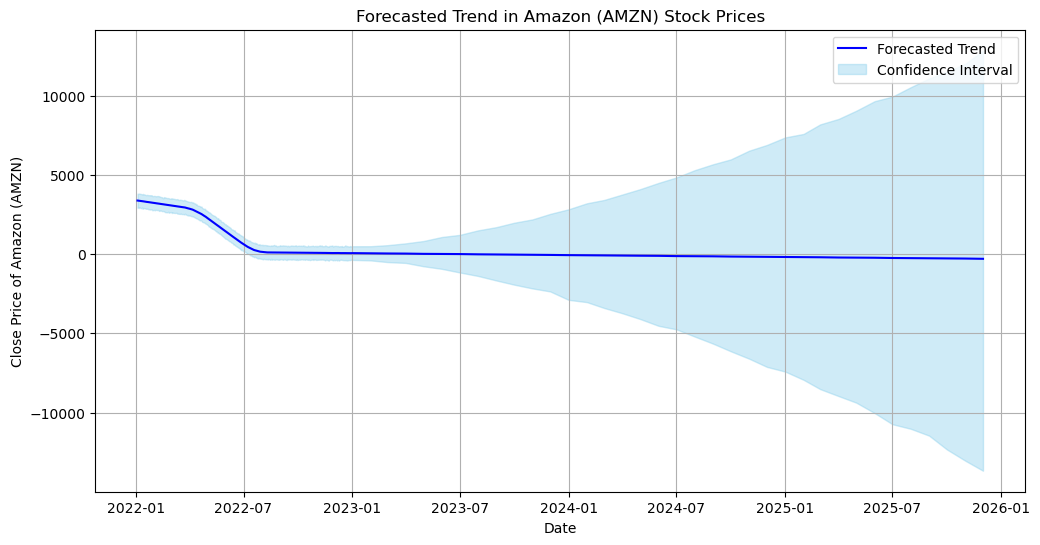

In [125]:
import matplotlib.pyplot as plt

# Plotting the forecasted data
plt.figure(figsize=(12, 6))
plt.plot(forecast['ds'], forecast['yhat'], color='blue', label='Forecasted Trend')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='skyblue', alpha=0.4, label='Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Close Price of Amazon (AMZN)')
plt.title('Forecasted Trend in Amazon (AMZN) Stock Prices')
plt.legend()
plt.grid(True)
plt.show()


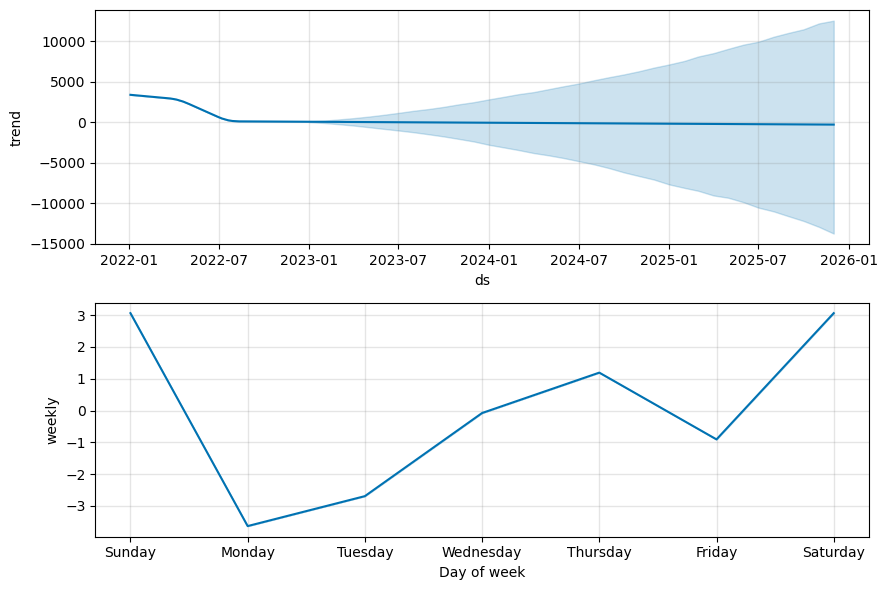

In [126]:
# Plot the components of the forecasted data
fig = amzn_prophet.plot_components(forecast)

### Prophet for Facebook

In [127]:
nflx_diff.head()

2022-01-04    -6.22
2022-01-05   -23.63
2022-01-06   -14.23
2022-01-07   -12.23
2022-01-10    -1.21
Name: close, dtype: float64

In [128]:
nflx_diff_df = pd.DataFrame(nflx_diff)
nflx_diff_df.head()

,close
2022-01-04,-6.22
2022-01-05,-23.63
2022-01-06,-14.23
2022-01-07,-12.23
2022-01-10,-1.21


In [129]:
nflx_diff_df.index

DatetimeIndex(['2022-01-04', '2022-01-05', '2022-01-06', '2022-01-07',
               '2022-01-10', '2022-01-11', '2022-01-12', '2022-01-13',
               '2022-01-14', '2022-01-18',
               ...
               '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21',
               '2022-12-22', '2022-12-23', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', length=250, freq=None)

In [130]:
## covert the data type of close to numeric
nflx_diff_df['close'] = pd.to_numeric(nflx_diff_df['close'])

In [131]:
# Reset index 'priceDate'to  a column again
nflx_diff_df.reset_index(inplace=True)

## rename ds and y
nflx_diff_df.rename(columns={'priceDate': 'ds', 'close': 'y'}, inplace=True)

In [132]:
nflx_diff_df.dtypes

index    datetime64[ns]
y               float64
dtype: object

In [133]:
nflx_diff_df.rename(columns={'index': 'ds'}, inplace=True)

In [134]:
nflx_diff_df.head()

,ds,y
0,2022-01-04,-6.22
1,2022-01-05,-23.63
2,2022-01-06,-14.23
3,2022-01-07,-12.23
4,2022-01-10,-1.21


In [135]:
nflx_diff_df.head()

,ds,y
0,2022-01-04,-6.22
1,2022-01-05,-23.63
2,2022-01-06,-14.23
3,2022-01-07,-12.23
4,2022-01-10,-1.21


In [136]:
series_nflx =nflx_df.copy()
series_nflx

,close,high,low,open,symbol,volume,id,key,updated,changeOverTime,...,month,quarter,year,7_day_ma,30_day_ma,close_std,rsi,close_lag_1,close_lag_7,close_pct_change
priceDate,,,,,,,,,,,,,,,,,,,,,
2022-01-03,597.370,609.9900,590.5600,605.61,NFLX,3068808.0,HISTORICAL_PRICES,NFLX,1.713001e+12,0.712300,...,1,1,2022,139.981429,81.077667,201.689599,99.493375,63.610,63.80,8.391133
2022-01-04,591.150,600.4099,581.6000,599.91,NFLX,4393135.0,HISTORICAL_PRICES,NFLX,1.713001e+12,0.694471,...,1,1,2022,215.382857,98.744667,258.828679,98.357979,597.370,63.34,-0.010412
2022-01-05,567.520,592.8400,566.8800,592.00,NFLX,4148749.0,HISTORICAL_PRICES,NFLX,1.713001e+12,0.626738,...,1,1,2022,287.340000,115.592667,278.908039,94.271044,591.150,63.82,-0.039973
2022-01-06,553.290,563.3600,542.0100,554.34,NFLX,5711795.0,HISTORICAL_PRICES,NFLX,1.713001e+12,0.585949,...,1,1,2022,357.208571,131.957333,274.927035,92.108790,567.520,64.21,-0.025074
2022-01-07,541.060,553.4300,538.2175,549.46,NFLX,3382873.0,HISTORICAL_PRICES,NFLX,1.713001e+12,0.550893,...,1,1,2022,425.421429,147.905000,247.829252,90.267886,553.290,63.57,-0.022104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,294.965,298.4614,291.9100,296.18,NFLX,4251108.0,HISTORICAL_PRICES,NFLX,1.713003e+12,-0.154513,...,12,4,2022,292.612143,300.038500,4.225924,38.552965,297.750,317.83,-0.009353
2022-12-27,284.170,293.5700,282.1300,293.19,NFLX,5778098.0,HISTORICAL_PRICES,NFLX,1.713003e+12,-0.185456,...,12,4,2022,291.720714,299.839833,5.291635,36.755418,294.965,290.41,-0.036598
2022-12-28,276.880,285.1900,273.4100,281.92,NFLX,5964369.0,HISTORICAL_PRICES,NFLX,1.713003e+12,-0.206352,...,12,4,2022,289.745000,299.093500,7.744994,31.486264,284.170,290.71,-0.025654


In [137]:
#transforms the index of the DataFrame into a regular column named 'Date',
series_nflx['priceDate'] = series_nflx.index
series_nflx

,close,high,low,open,symbol,volume,id,key,updated,changeOverTime,...,quarter,year,7_day_ma,30_day_ma,close_std,rsi,close_lag_1,close_lag_7,close_pct_change,priceDate
priceDate,,,,,,,,,,,,,,,,,,,,,
2022-01-03,597.370,609.9900,590.5600,605.61,NFLX,3068808.0,HISTORICAL_PRICES,NFLX,1.713001e+12,0.712300,...,1,2022,139.981429,81.077667,201.689599,99.493375,63.610,63.80,8.391133,2022-01-03
2022-01-04,591.150,600.4099,581.6000,599.91,NFLX,4393135.0,HISTORICAL_PRICES,NFLX,1.713001e+12,0.694471,...,1,2022,215.382857,98.744667,258.828679,98.357979,597.370,63.34,-0.010412,2022-01-04
2022-01-05,567.520,592.8400,566.8800,592.00,NFLX,4148749.0,HISTORICAL_PRICES,NFLX,1.713001e+12,0.626738,...,1,2022,287.340000,115.592667,278.908039,94.271044,591.150,63.82,-0.039973,2022-01-05
2022-01-06,553.290,563.3600,542.0100,554.34,NFLX,5711795.0,HISTORICAL_PRICES,NFLX,1.713001e+12,0.585949,...,1,2022,357.208571,131.957333,274.927035,92.108790,567.520,64.21,-0.025074,2022-01-06
2022-01-07,541.060,553.4300,538.2175,549.46,NFLX,3382873.0,HISTORICAL_PRICES,NFLX,1.713001e+12,0.550893,...,1,2022,425.421429,147.905000,247.829252,90.267886,553.290,63.57,-0.022104,2022-01-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,294.965,298.4614,291.9100,296.18,NFLX,4251108.0,HISTORICAL_PRICES,NFLX,1.713003e+12,-0.154513,...,4,2022,292.612143,300.038500,4.225924,38.552965,297.750,317.83,-0.009353,2022-12-23
2022-12-27,284.170,293.5700,282.1300,293.19,NFLX,5778098.0,HISTORICAL_PRICES,NFLX,1.713003e+12,-0.185456,...,4,2022,291.720714,299.839833,5.291635,36.755418,294.965,290.41,-0.036598,2022-12-27
2022-12-28,276.880,285.1900,273.4100,281.92,NFLX,5964369.0,HISTORICAL_PRICES,NFLX,1.713003e+12,-0.206352,...,4,2022,289.745000,299.093500,7.744994,31.486264,284.170,290.71,-0.025654,2022-12-28


In [138]:
series_nflx.columns

Index(['close', 'high', 'low', 'open', 'symbol', 'volume', 'id', 'key',
       'updated', 'changeOverTime', 'marketChangeOverTime', 'uOpen', 'uClose',
       'uHigh', 'uLow', 'uVolume', 'fOpen', 'fClose', 'fHigh', 'fLow',
       'fVolume', 'label', 'change', 'changePercent', 'Name', 'day_of_week',
       'month', 'quarter', 'year', '7_day_ma', '30_day_ma', 'close_std', 'rsi',
       'close_lag_1', 'close_lag_7', 'close_pct_change', 'priceDate'],
      dtype='object')

In [139]:
series_nflx = series_nflx[['priceDate','close']]
series_nflx = series_nflx.reset_index(drop=True)

In [140]:
series_nflx.head()

,priceDate,close
0,2022-01-03,597.37
1,2022-01-04,591.15
2,2022-01-05,567.52
3,2022-01-06,553.29
4,2022-01-07,541.06


In [141]:
start_date = '2022-01-01'
end_date = '2022-12-31'
series_nflx = series_nflx[(series_nflx['priceDate'] >= start_date) & (series_nflx['priceDate'] <= end_date)]

In [142]:
series_nflx.columns = ['ds','y']
series_nflx.head()

,ds,y
0,2022-01-03,597.37
1,2022-01-04,591.15
2,2022-01-05,567.52
3,2022-01-06,553.29
4,2022-01-07,541.06


In [143]:
## Intialize
amzn_prophet_two = Prophet()
amzn_prophet_two.fit(series_nflx)

11:13:41 - cmdstanpy - INFO - Chain [1] start processing
11:13:41 - cmdstanpy - INFO - Chain [1] done processing


In [144]:
# Define the number of periods and frequency
periods = 36  # Number of periods into the future
freq = 'MS'   # Frequency: Monthly start


# Make future dataframe
future_dates_two = amzn_prophet_two.make_future_dataframe(periods=periods, freq=freq)
forecast_two = amzn_prophet_two.predict(future_dates_two)


forecasted_data_two = forecast_two[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecasted_data_two

,ds,yhat,yhat_lower,yhat_upper
0,2022-01-03,520.490380,478.152525,561.680969
1,2022-01-04,516.997258,477.925402,555.212332
2,2022-01-05,514.014202,473.560680,555.002623
3,2022-01-06,511.963724,472.049953,554.152494
4,2022-01-07,506.195749,464.678084,547.441750
...,...,...,...,...
282,2025-08-01,911.133695,215.283870,1581.544585
283,2025-09-01,935.860588,201.955330,1638.522064
284,2025-10-01,953.340248,192.229913,1695.477231
285,2025-11-01,1018.393596,220.898299,1797.829508


In [145]:
# Trim the forecasted data to match the length of the actual data
forecasted_data_trimmed = forecasted_data_two.iloc[:len(series_nflx)]

# Extract actual and predicted values
actual_values = series_nflx['y'].values  # Assuming your actual values are stored in a column named 'y'
predicted_values = forecasted_data_trimmed['yhat'].values  # Assuming 'yhat' contains the predicted values

# Compute MSE
mse = mean_squared_error(actual_values, predicted_values)
print("Mean Squared Error (MSE):", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 998.7119173220511
Root Mean Squared Error (RMSE): 31.60240366367804


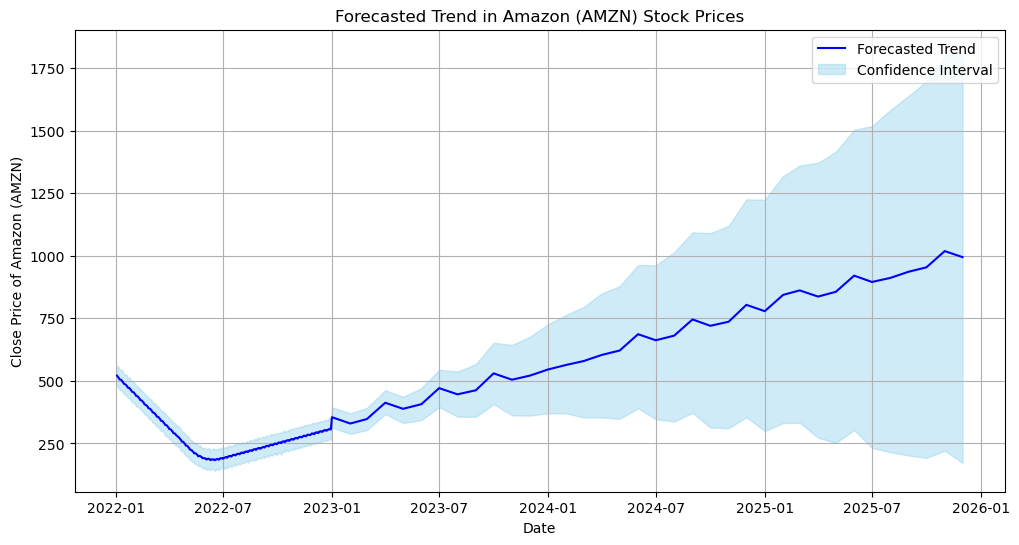

In [146]:
import matplotlib.pyplot as plt

# Plotting the forecasted data
plt.figure(figsize=(12, 6))
plt.plot(forecast_two['ds'], forecast_two['yhat'], color='blue', label='Forecasted Trend')
plt.fill_between(forecast_two['ds'], forecast_two['yhat_lower'], forecast_two['yhat_upper'], color='skyblue', alpha=0.4, label='Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Close Price of Amazon (AMZN)')
plt.title('Forecasted Trend in Amazon (AMZN) Stock Prices')
plt.legend()
plt.grid(True)
plt.show()

- There is a general upward trend in stock market prices throughout the timeframe. This suggests that, on average, netflix stock market price will in  have increased over the decade..

- The graph hints at potential periods of rapid increase followed by periods of stagnation or slight decrease.

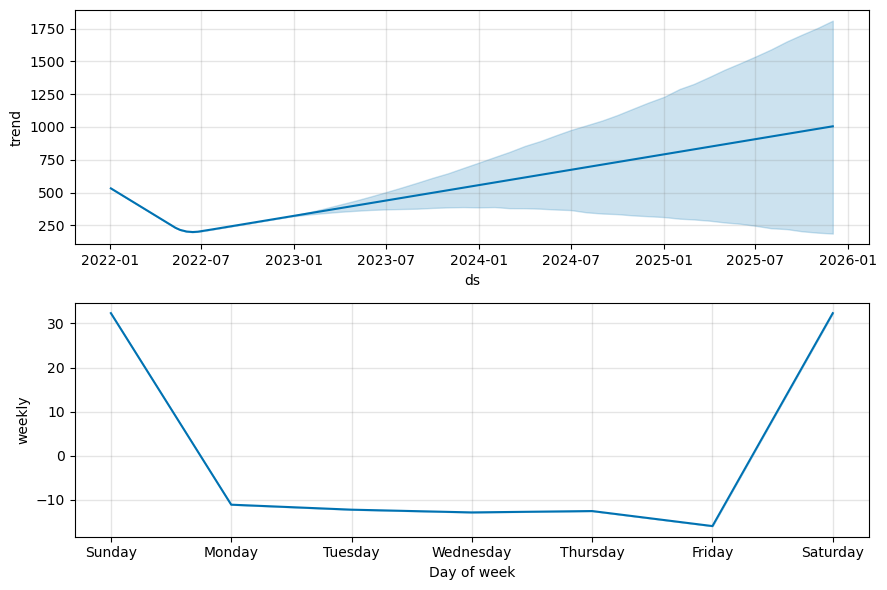

In [147]:
# Plot the components of the forecasted data
fig = amzn_prophet_two.plot_components(forecast_two)

## Model Evaluation and Perfomance

We have been able to generate recommendations using the following recommender algorithms thus far:
1. Moving Avergaes.
2. Autoregressive model.
3. Autoregressive moving avergaes.
4. Autoregressive integrated moving averages
5. Seasonal AutoRegressive Moving Average Model.
6. Facebook Prophet
.

## Model Selection Criteria

In [149]:
metrics_data = {'Model': ['Moving Averages', 'Autoregressive Model', 'Autoregressive moving Averages', 
                          'Autoregressive intergrated moving Averages', 'Seasonal AutoRegressive Moving Average Model'],
                'AIC Value': [ 3246.632,3248.458, 3250.417, 3242.061, 
                              3102.358],
                'BIC Value': [ 3254.410, 3260.124, 3265.972, 3253.719,  
                             3105.831]
               }

metrics_df = pd.DataFrame.from_dict(metrics_data)
metrics_df

,Model,AIC Value,BIC Value
0,Moving Averages,3246.632,3254.410
1,Autoregressive Model,3248.458,3260.124
2,Autoregressive moving Averages,3250.417,3265.972
3,Autoregressive intergrated moving Averages,3242.061,3253.719
4,Seasonal AutoRegressive Moving Average Model,3102.358,3105.831


## Model Comparison

To determine which model is the best fit, we looked at criteria of Akaike Information Criterion (AIC) or the Bayesian Information Criterion (BIC). These criteria balance goodness of fit with model complexity, penalizing overly complex models to avoid overfitting.

In our case, lower AIC and BIC values indicate a better model fit. Let's analyze the AIC and BIC values for each model:

1. **Moving Averages**: AIC = 3246.632, BIC = 3254.410
2. **Autoregressive Model**: AIC = 3248.458, BIC = 3260.124
3. **Autoregressive Moving Averages**: AIC = 3250.417, BIC = 3265.972
4. **Autoregressive Integrated Moving Averages (ARIMA)**: AIC = 3242.061, BIC = 3253.719
5. **Seasonal AutoRegressive Moving Average Model (SARIMA)**: AIC = 3102.358, BIC = 3105.831

Based on both AIC and BIC values, we can see that the Autoregressive Integrated Moving Averages (ARIMA) model has the lowest AIC (3242.061) and the lowest BIC (3253.719). This suggests that the ARIMA model provides the best balance between goodness of fit and model complexity among the opt

Therefore, the conclusion would be that the **Seasonal AutoRegressive Moving Average Model (SARIMA)** model perform better compared to the other models.

When the SARIMA model is comapred to the prophet model The Prophet model captures the underlying patterns and dynamics of the stock market data more effectively than the SARIMA model. This could be due to Prophet's ability to handle complex seasonal patterns and trend changes in the data more intuitively. 

Therefore prophet model is performing better in terms of predictive accuracy for the given dataset and forecasting horizon thus the best model.

# Model Deployment

Our deployment leverages Streamlit, a powerful open-source app framework for Machine Learning projects, to create an intuitive and interactive interface. Through this interface, users can easily access our stock market prediction model built on Prophet, a forecasting tool developed by Facebook's Data Science team.

Prophet employs an additive regression model to forecast time series data with daily observations that display patterns on different time scales, such as yearly, weekly, and daily fluctuations. By incorporating historical data, seasonality, and relevant trends, our model generates accurate forecasts for stock prices, enabling users to make informed investment decisions.

With Streamlit, we offer a user-friendly platform where investors and analysts can input their desired stock symbols and adjust parameters to explore various forecasting scenarios. The deployment provides visualizations of historical trends, predicted future prices, and uncertainty intervals, empowering users to gain valuable insights into potential market movements.

Our deployment combines the robust forecasting capabilities of Prophet with the accessibility and interactivity of Streamlit, delivering a seamless and powerful tool for stock market prediction.

# Conclusion

* By bridging the gap between raw financial data and strategic decision-making, stakeholders can access actionable insights derived from advanced data analysis techniques.
* Empowering stakeholders in the financial sector with robust predictive tools enables them to navigate the complexities of the stock market more effectively.
* Through pioneering innovative approaches and methodologies, the study aims to redefine the boundaries of predictive analytics in finance, driving tangible value and sustainable growth within the ecosystem.

Ultimately, this endeavor represents a significant step towards reshaping the landscape of finance, fostering resilience and efficiency in markets while empowering stakeholders to make informed decisions in an ever-changing environment.

# Recommendations

**Optimize Portfolio Management**: Enhance portfolio management strategies by integrating advanced risk assessment models and predictive tools into decision-making processes. By identifying and managing risks effectively, investors and traders can optimize their stock portfolios, improve investment quality, and enhance overall financial performance in the stock market.

**Monitor Market Drivers**: Stay informed about key market drivers, regional trends, and price volatility to anticipate market shifts and capitalize on emerging opportunities. Regularly analyze market indicators, economic factors, and industry developments to make informed decisions. 

**Continuous Learning and Adaptation**: Establish a culture of continuous learning and adaptation within the organization to stay abreast of evolving stock market dynamics. Regularly update models, refine strategies, and monitor key performance indicators to ensure agility and responsiveness to market shifts.
